<a href="https://colab.research.google.com/github/ZeyTrack/GP/blob/main/ML%26%26OR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import and Read Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Exploratory Data Analysis**

In [ ]:
!pip install ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=be859247863dc5b69fff55aee9527fec84394be359d38892f4fed27a54851357
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


In [ ]:
df  = pd.read_csv("/content/drive/MyDrive/Crop_recommendation_expanded_realistic.csv")
df2 = df
df.head (5)

N     P     K  temperature   humidity        ph    rainfall label
0  90.0  42.0  43.0    20.879744  82.002744  6.502985  202.935536  rice
1  85.0  58.0  41.0    21.770462  80.319644  7.038096  226.655537  rice
2  60.0  55.0  44.0    23.004459  82.320763  7.840207  263.964248  rice
3  74.0  35.0  40.0    26.491096  80.158363  6.980401  242.864034  rice
4  78.0  42.0  42.0    20.130175  81.604873  7.628473  262.717340  rice

In [ ]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_notebook_iframe()
profile.to_file("data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 12.32it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

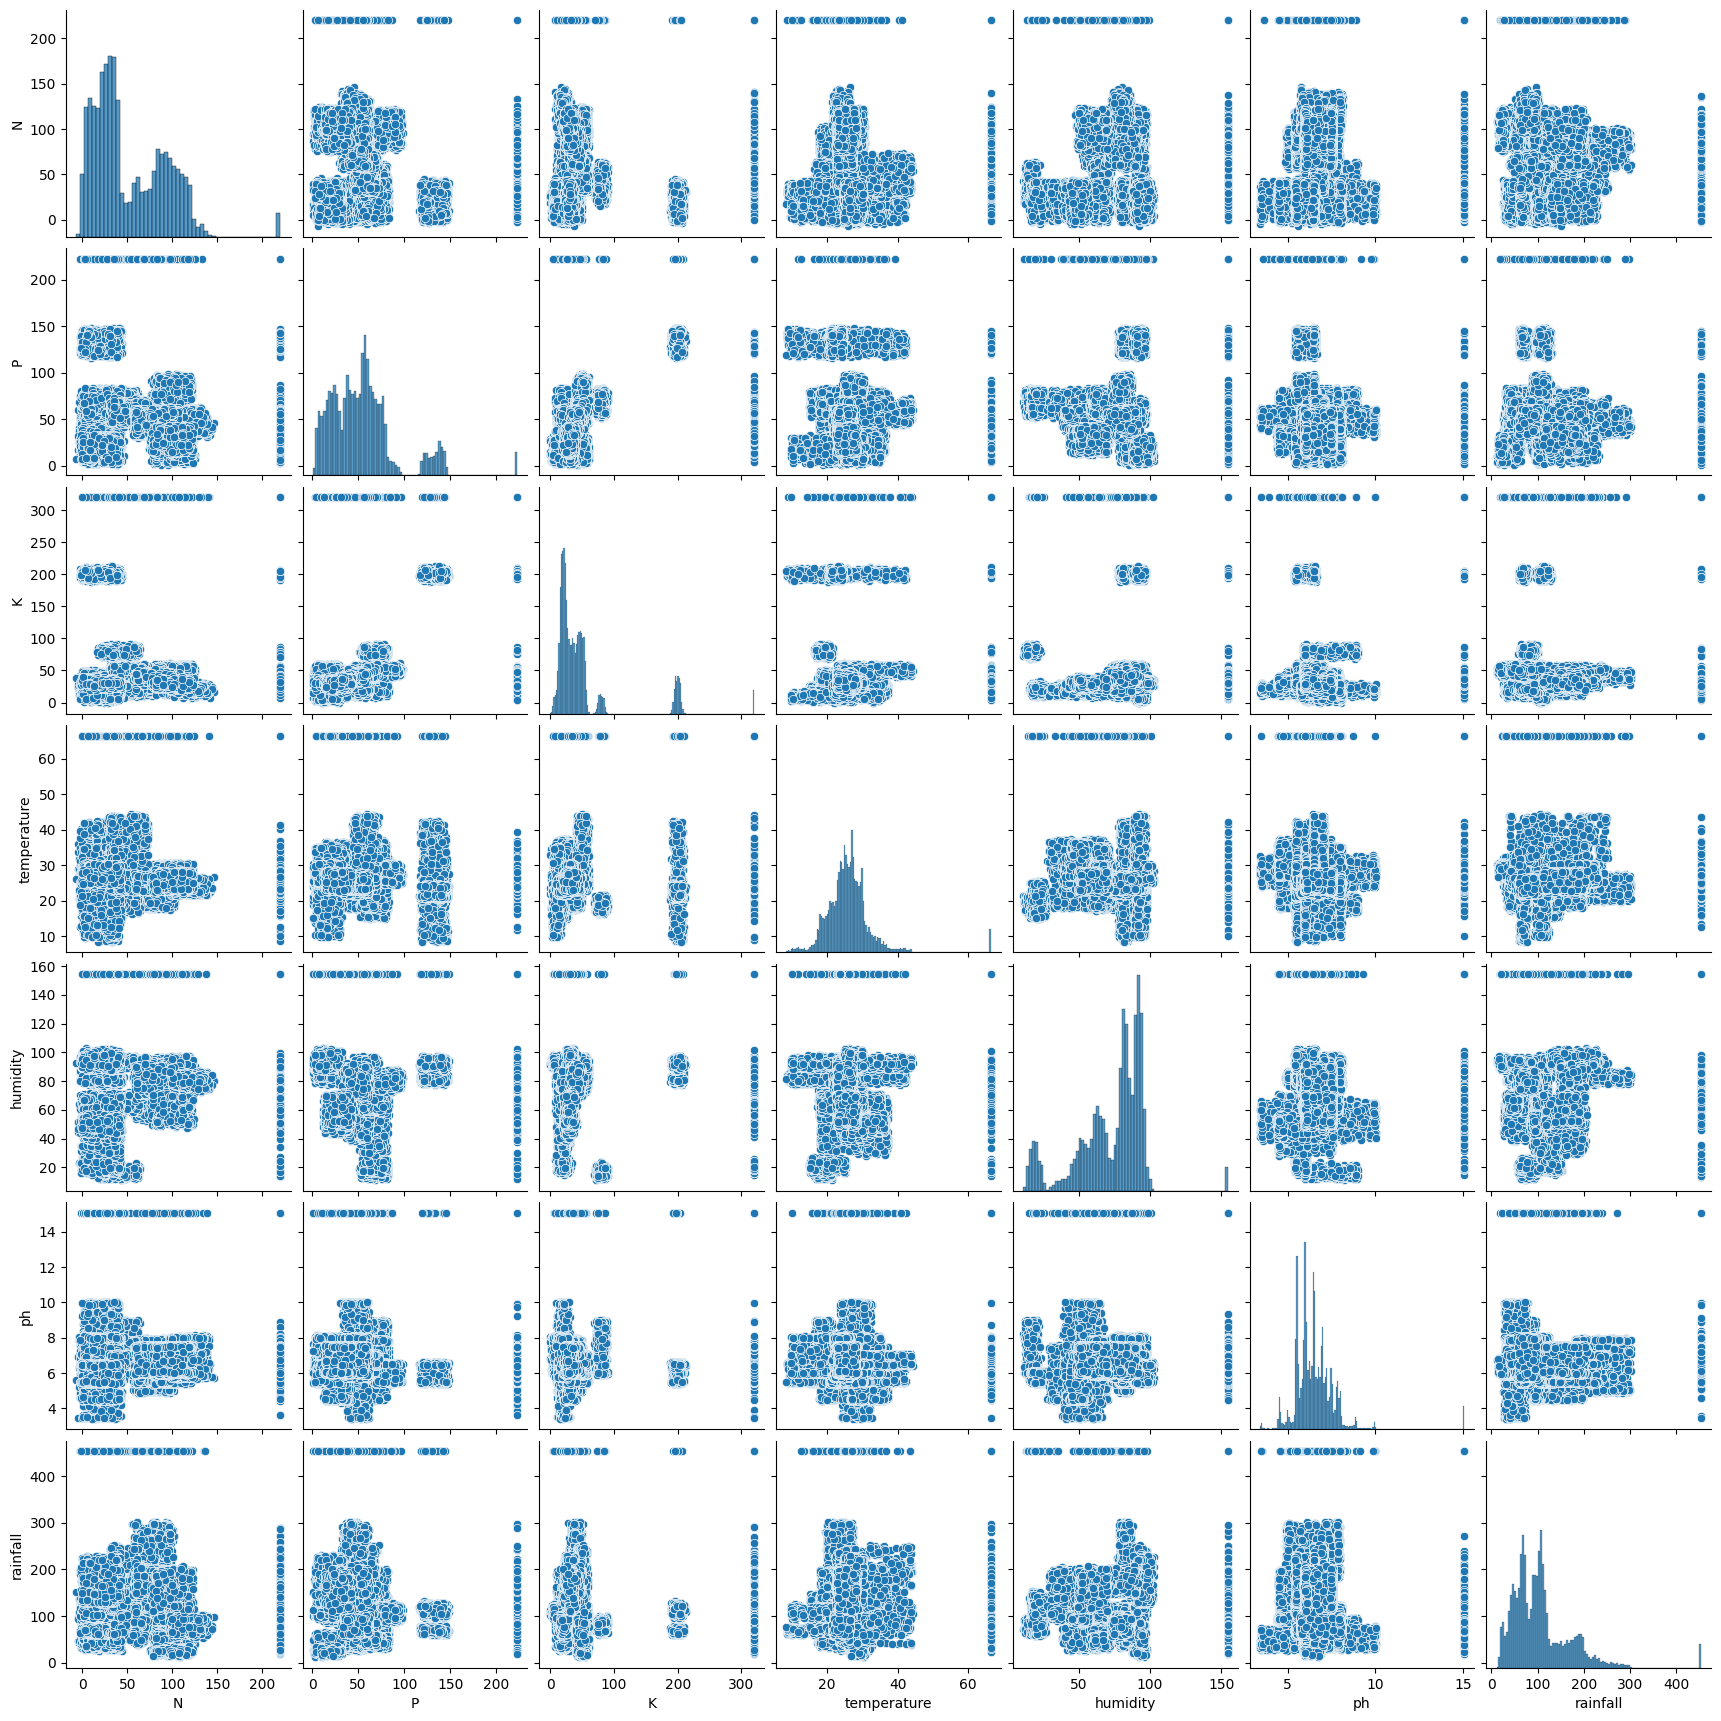

In [ ]:
sns.pairplot(df)
plt.show()

In [ ]:
df.shape

(24200, 8)

In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df.describe()

N             P             K   temperature      humidity  \
count  24200.000000  24200.000000  24200.000000  24200.000000  24200.000000   
mean      50.616406     53.177033     48.203628     25.612479     71.466580   
std       36.903560     32.958444     50.644523      5.102845     22.323487   
min        0.000000      5.000000      5.000000      8.825675     14.258040   
25%       20.971333     27.896527     20.495157     22.681873     60.091166   
50%       37.035173     50.924649     31.977448     25.623239     80.180639   
75%       84.676150     67.789225     48.775796     28.555654     90.006217   
max      140.000000    145.000000    205.000000     43.675493     99.981876   

                 ph      rainfall  
count  24200.000000  24200.000000  
mean       6.457627    103.414764  
std        0.923178     54.882311  
min        3.504752     20.211267  
25%        5.916454     65.010953  
50%        6.470466     95.015518  
75%        6.993473    123.762141  
max        9.935091    298.560117

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24200 entries, 0 to 24199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            24200 non-null  float64
 1   P            24200 non-null  float64
 2   K            24200 non-null  float64
 3   temperature  24200 non-null  float64
 4   humidity     24200 non-null  float64
 5   ph           24200 non-null  float64
 6   rainfall     24200 non-null  float64
 7   label        24200 non-null  object 
dtypes: float64(7), object(1)
memory usage: 1.5+ MB


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

In [ ]:
df2.shape

(24200, 8)

check balance per Crop Class

In [ ]:
print(df['label'].value_counts())


label
rice           1100
maize          1100
chickpea       1100
kidneybeans    1100
pigeonpeas     1100
mothbeans      1100
mungbean       1100
blackgram      1100
lentil         1100
pomegranate    1100
banana         1100
mango          1100
grapes         1100
watermelon     1100
muskmelon      1100
apple          1100
orange         1100
papaya         1100
coconut        1100
cotton         1100
jute           1100
coffee         1100
Name: count, dtype: int64


General Feature Distribution


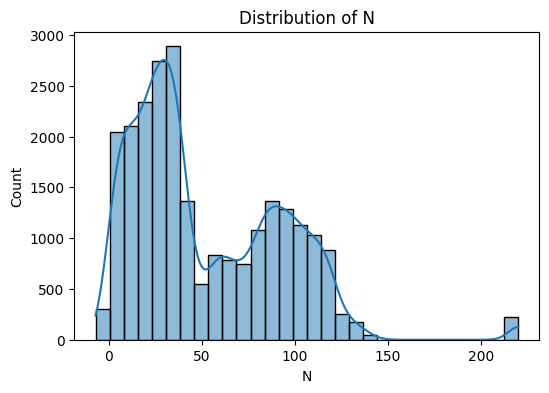

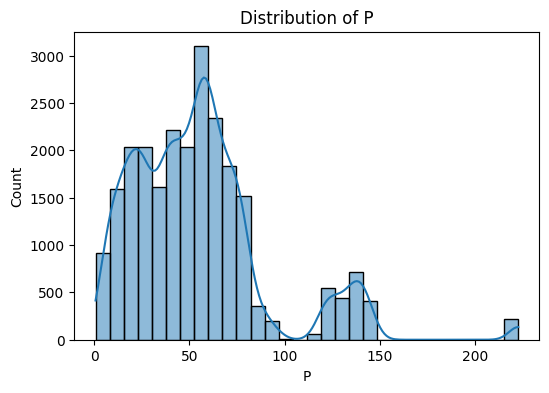

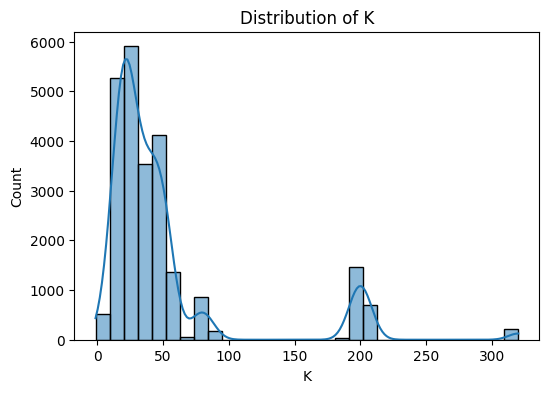

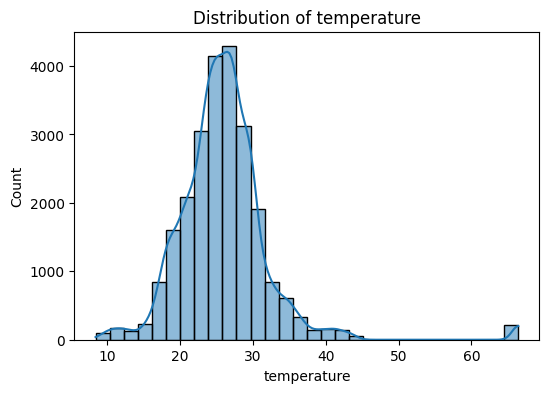

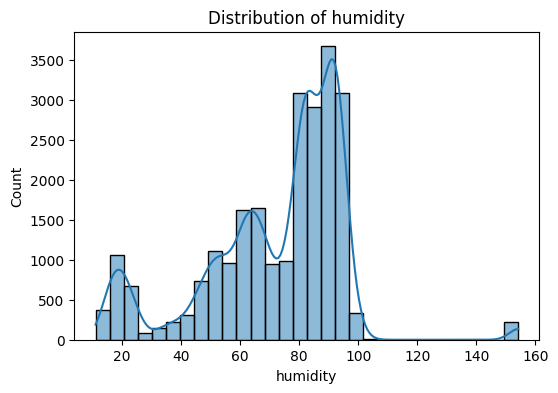

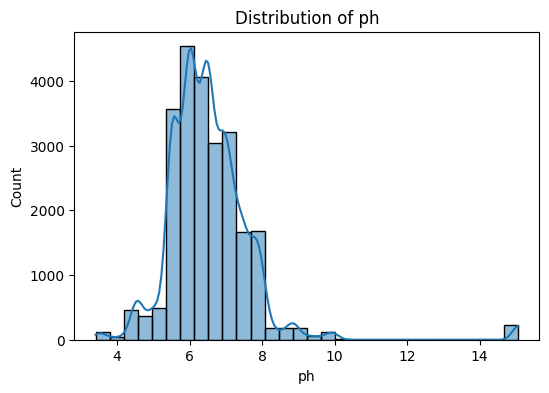

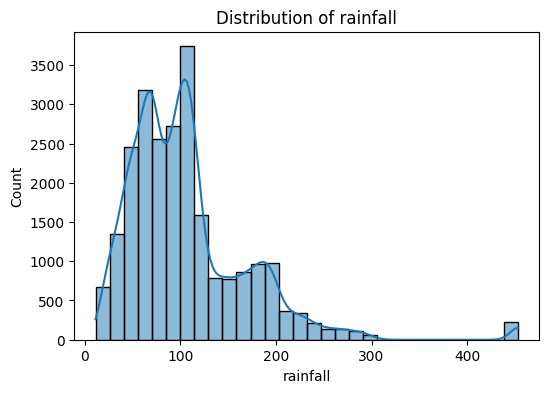

In [ ]:
for feature in features:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


Outlier Detection Per Class (for each crop)

Outlier check for crop: rice


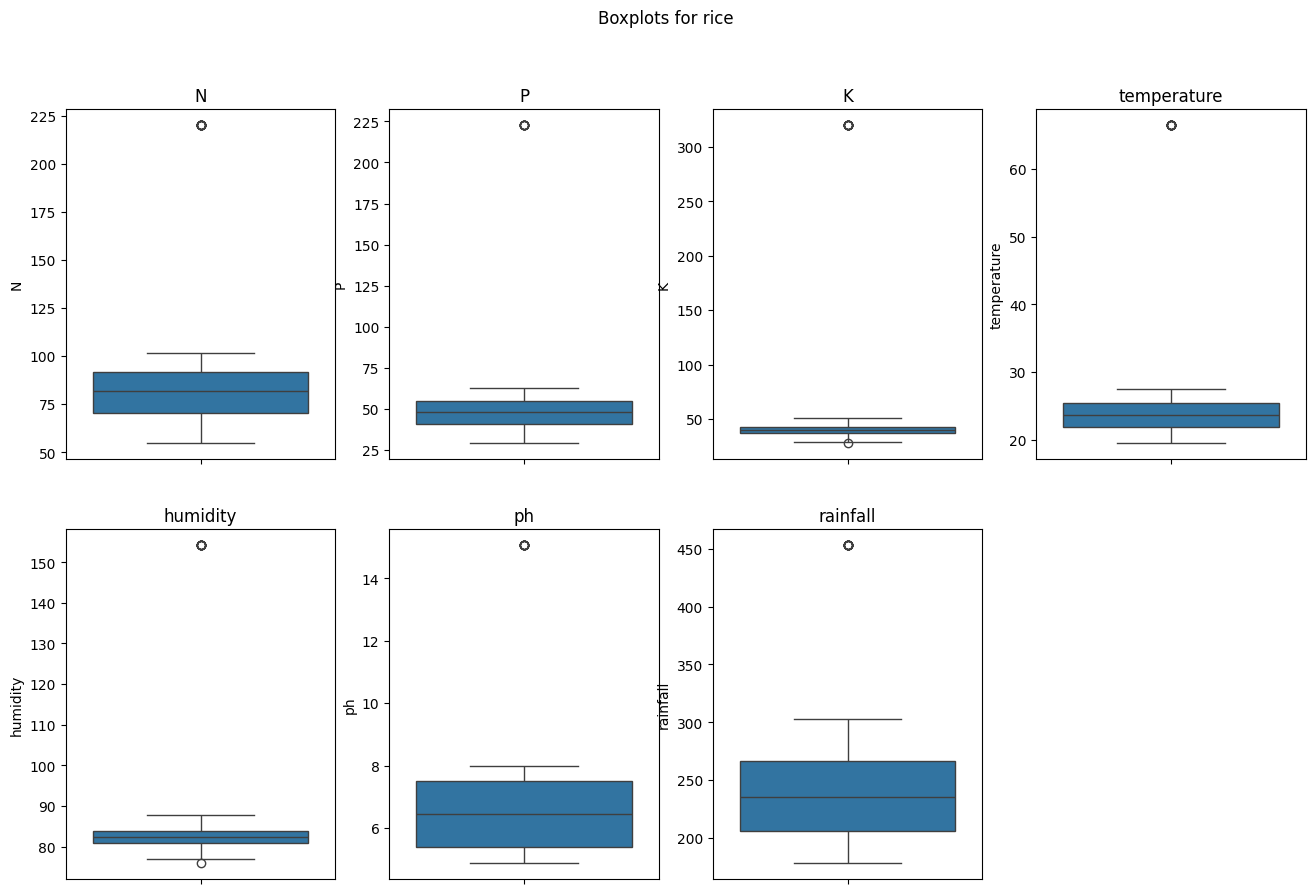

Outlier check for crop: maize


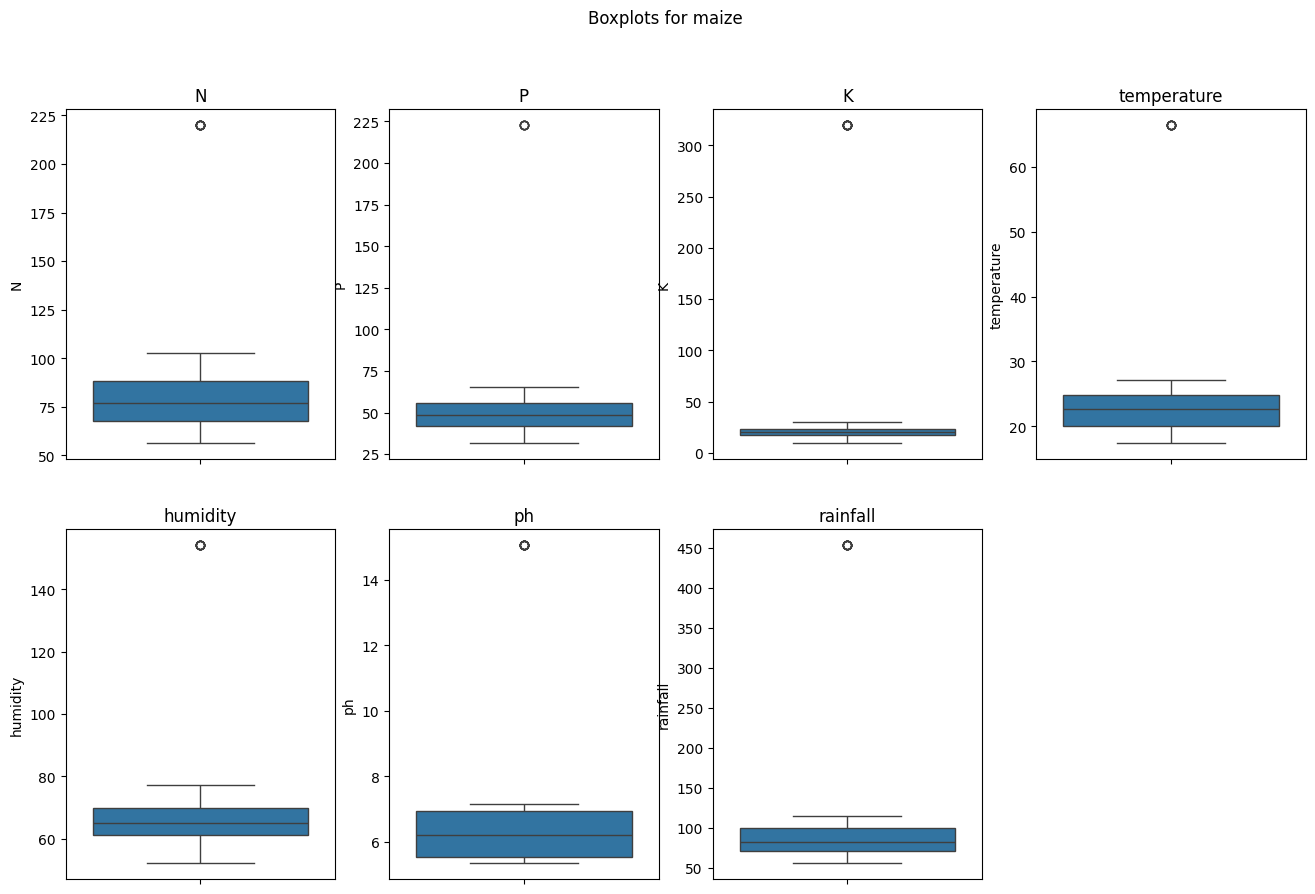

Outlier check for crop: chickpea


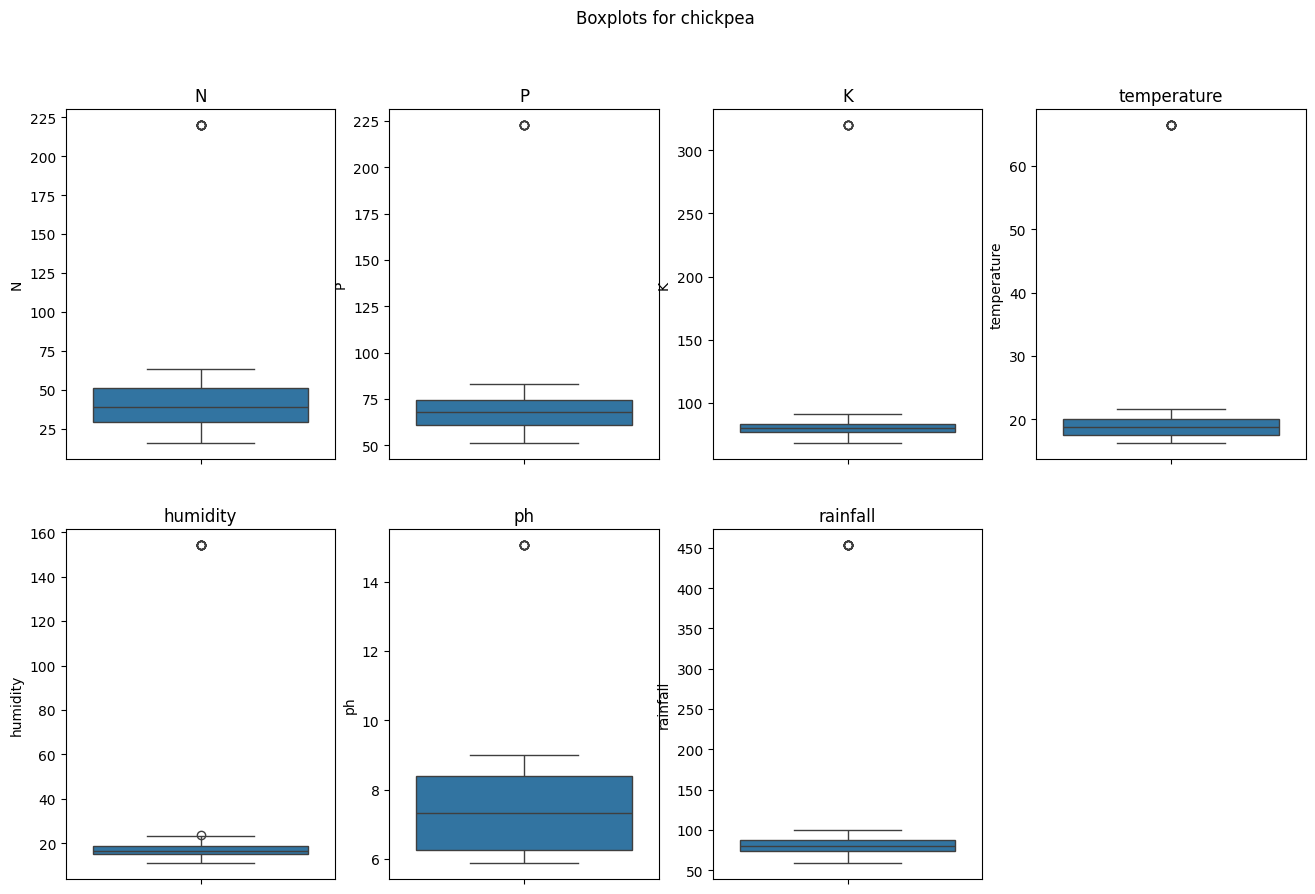

Outlier check for crop: kidneybeans


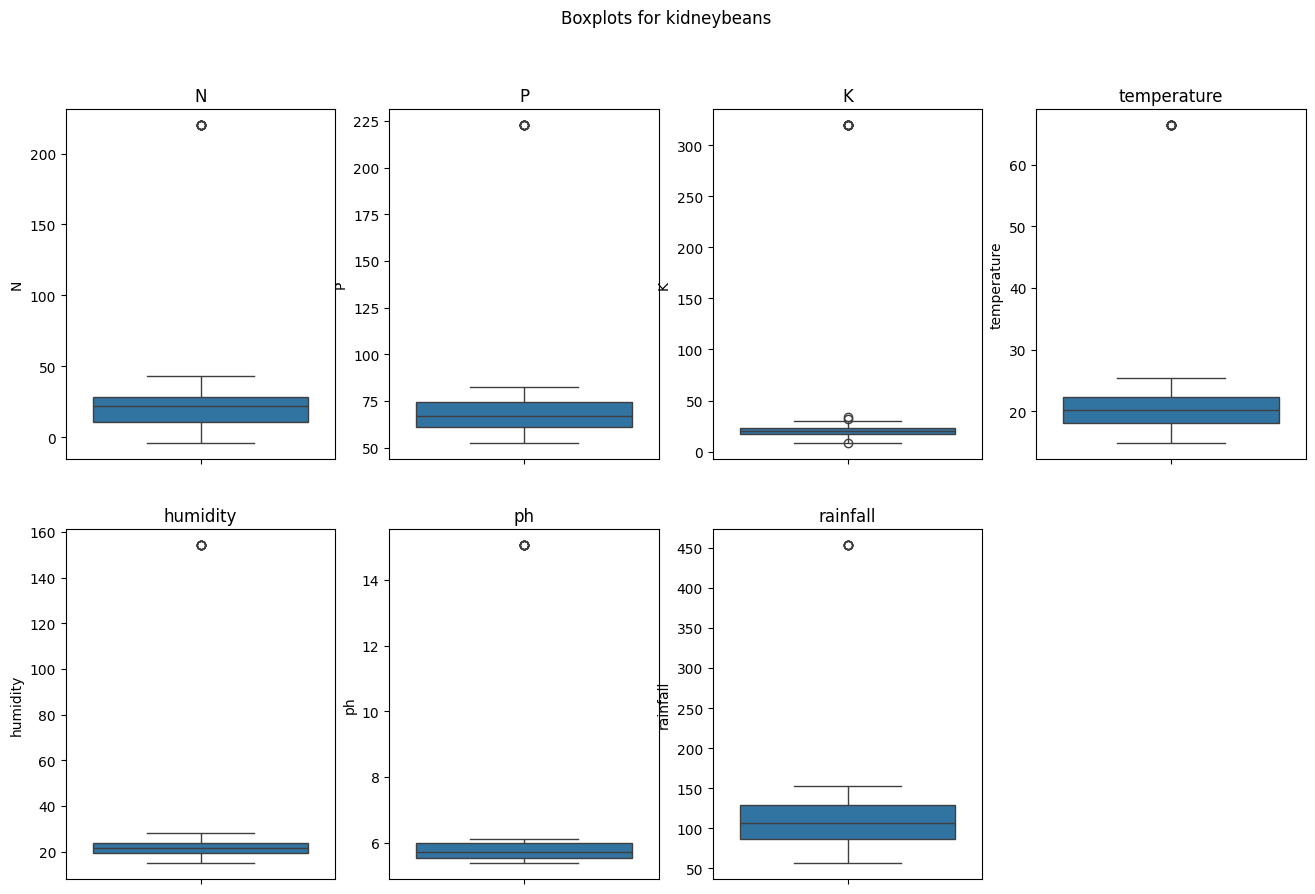

Outlier check for crop: pigeonpeas


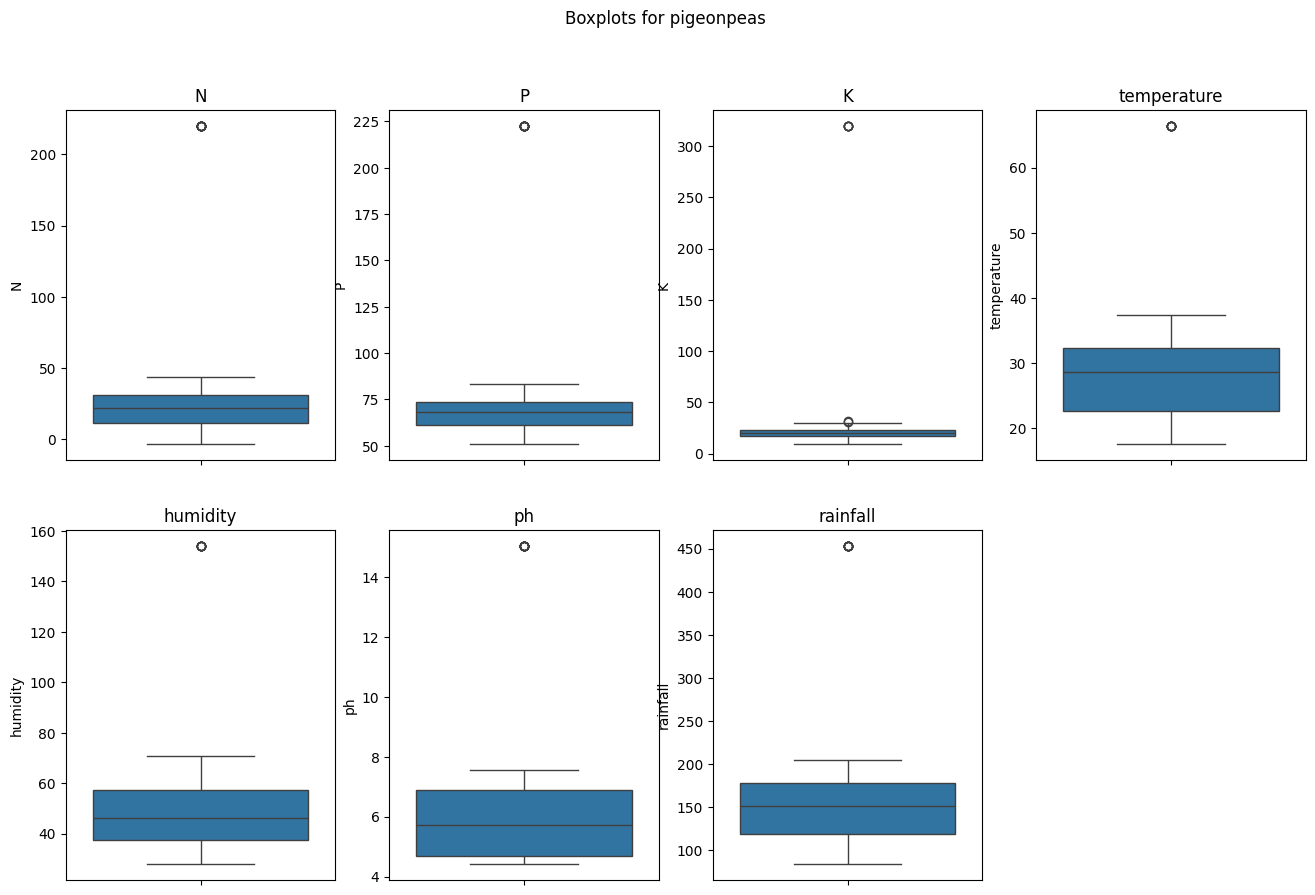

Outlier check for crop: mothbeans


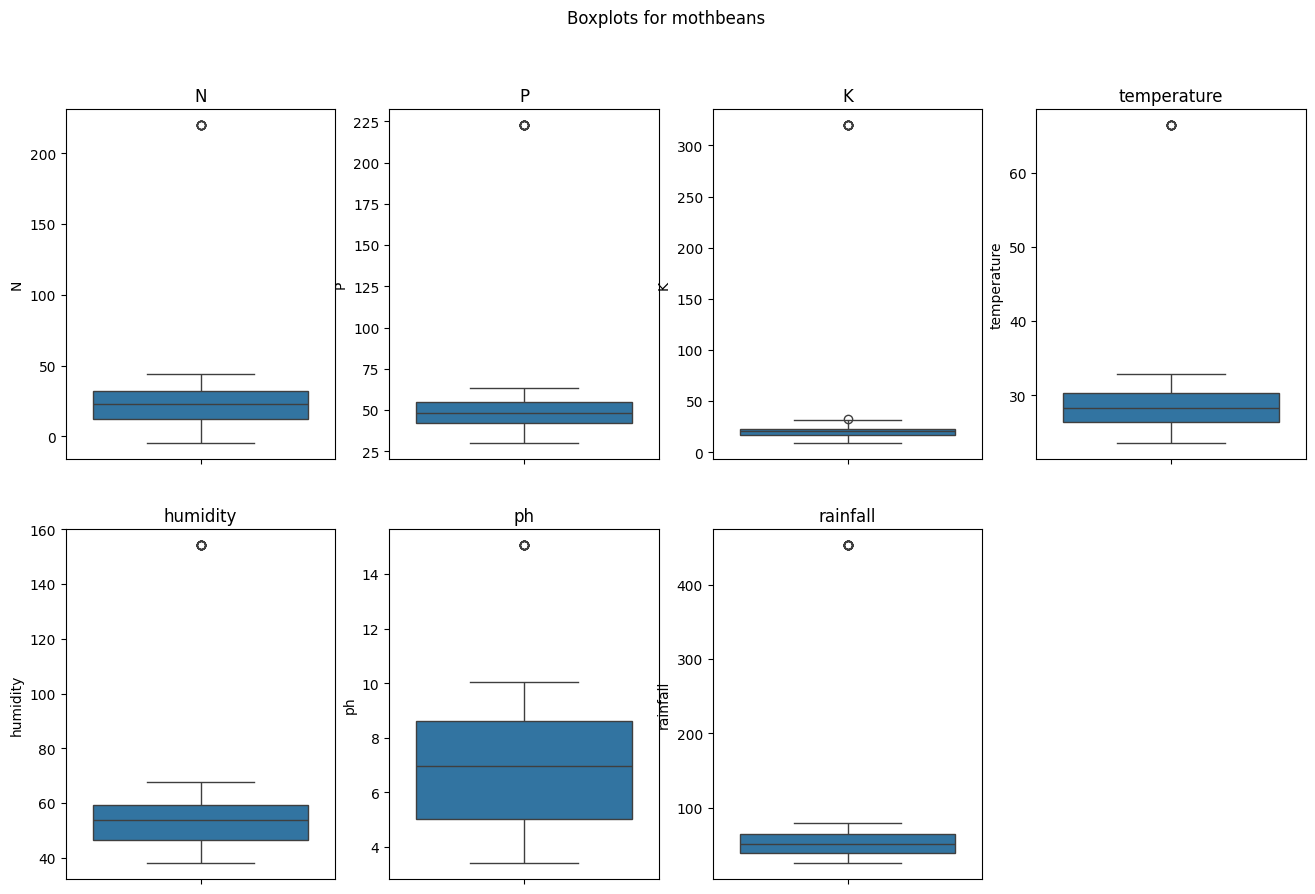

Outlier check for crop: mungbean


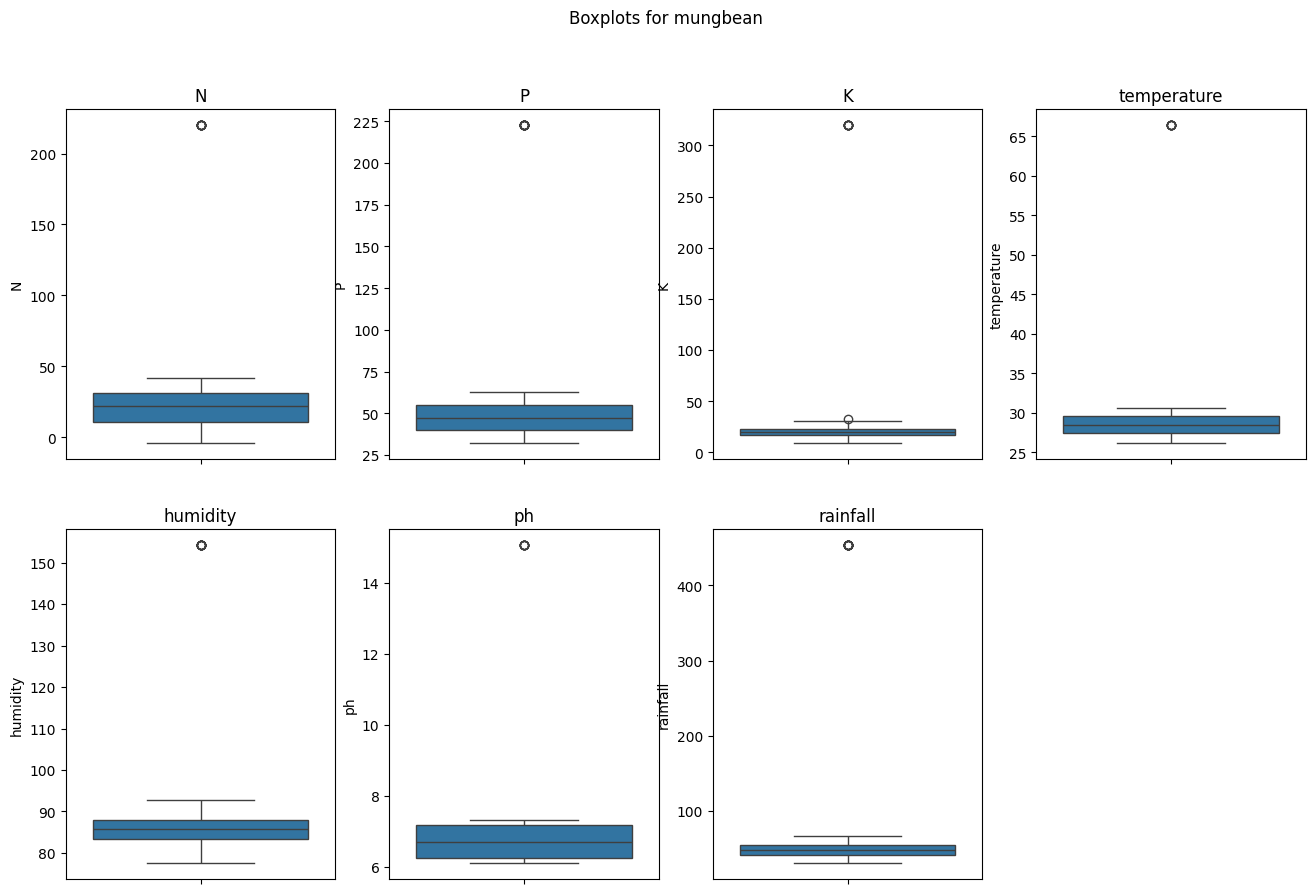

Outlier check for crop: blackgram


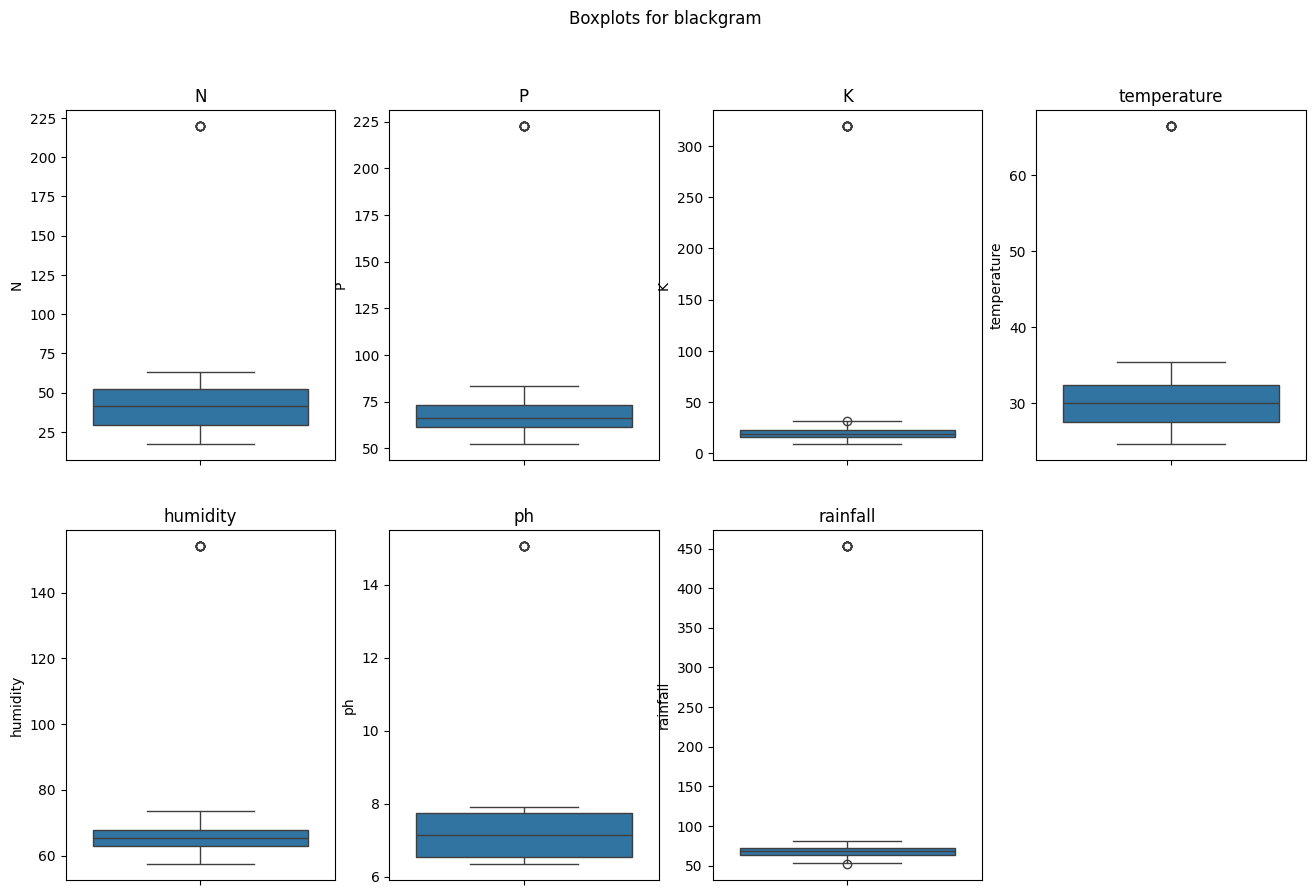

Outlier check for crop: lentil


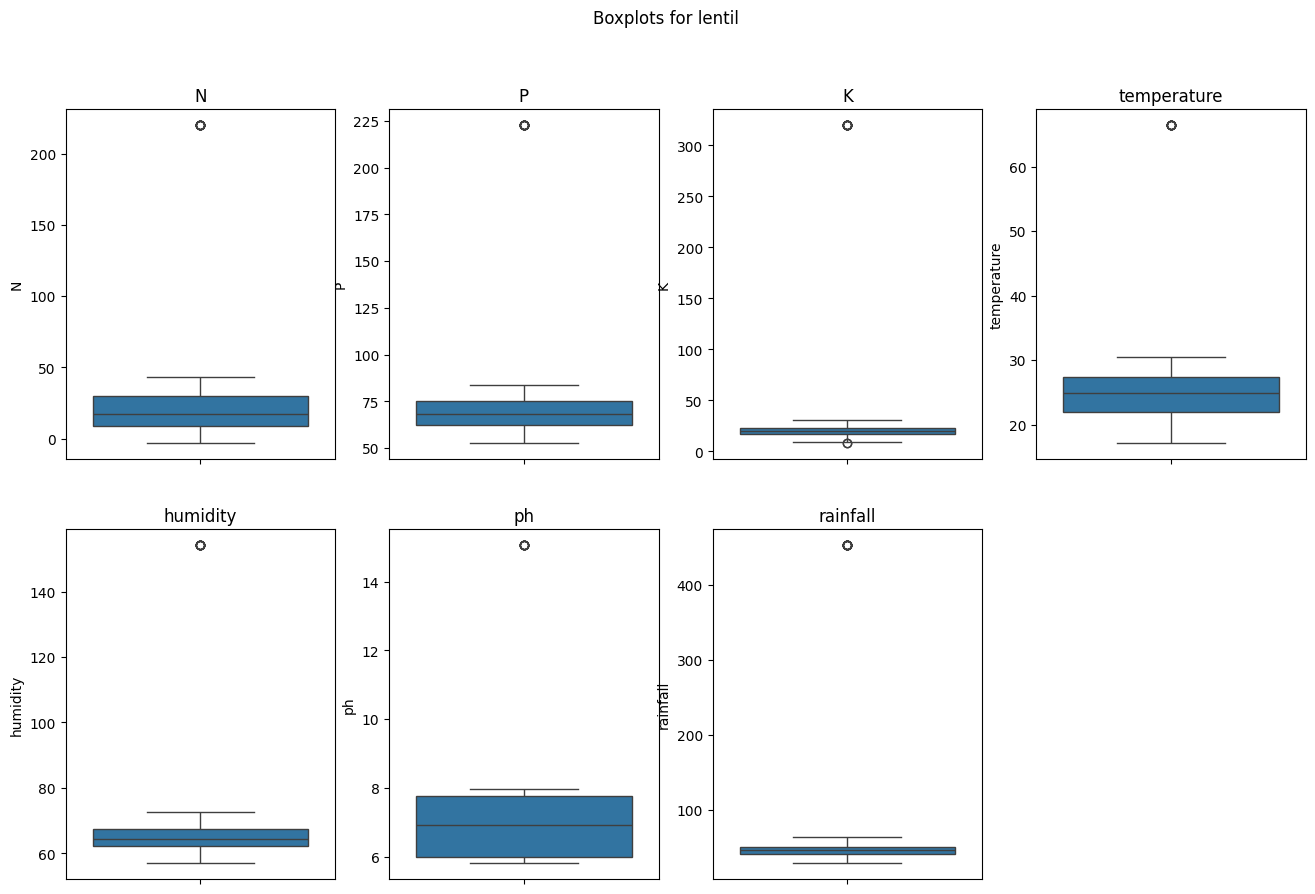

Outlier check for crop: pomegranate


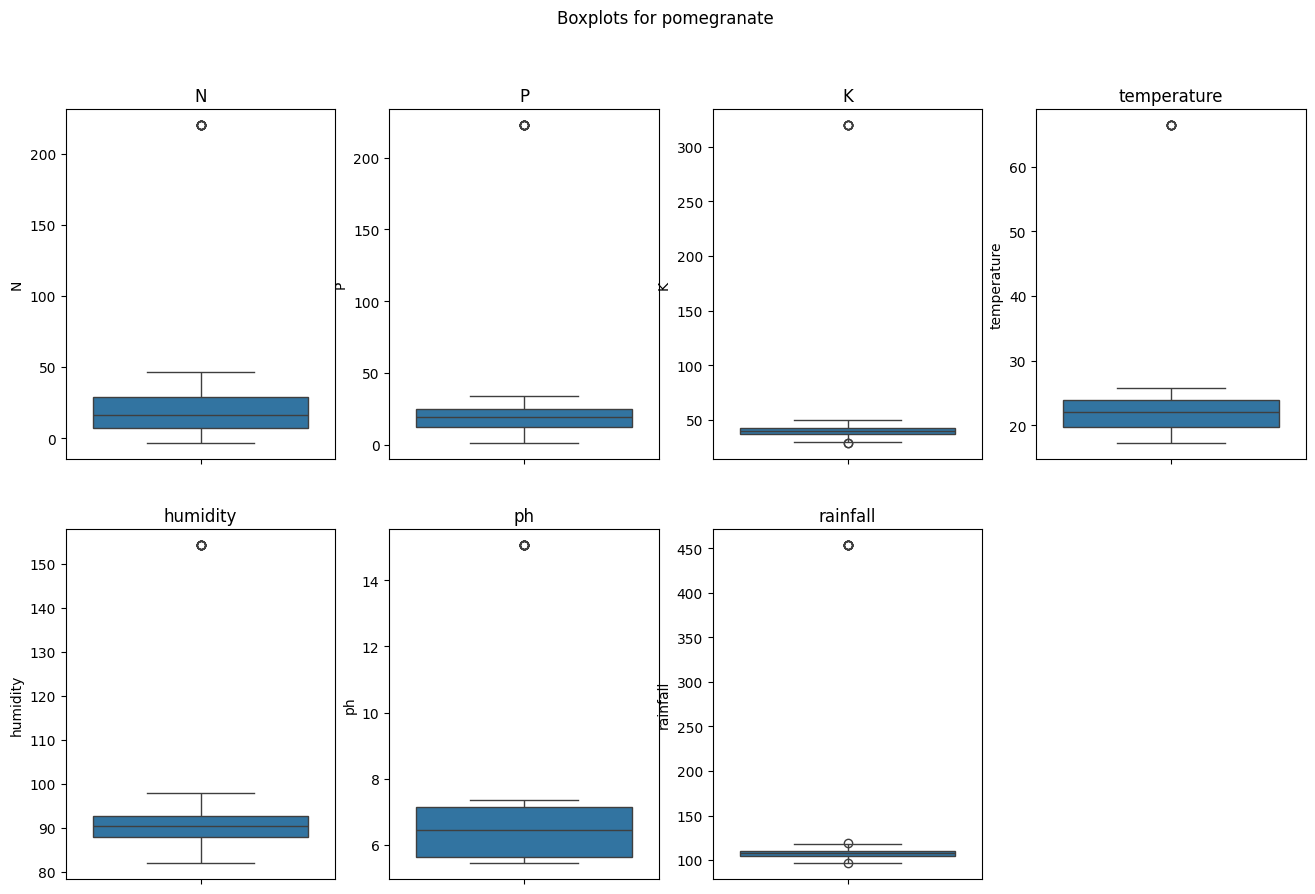

Outlier check for crop: banana


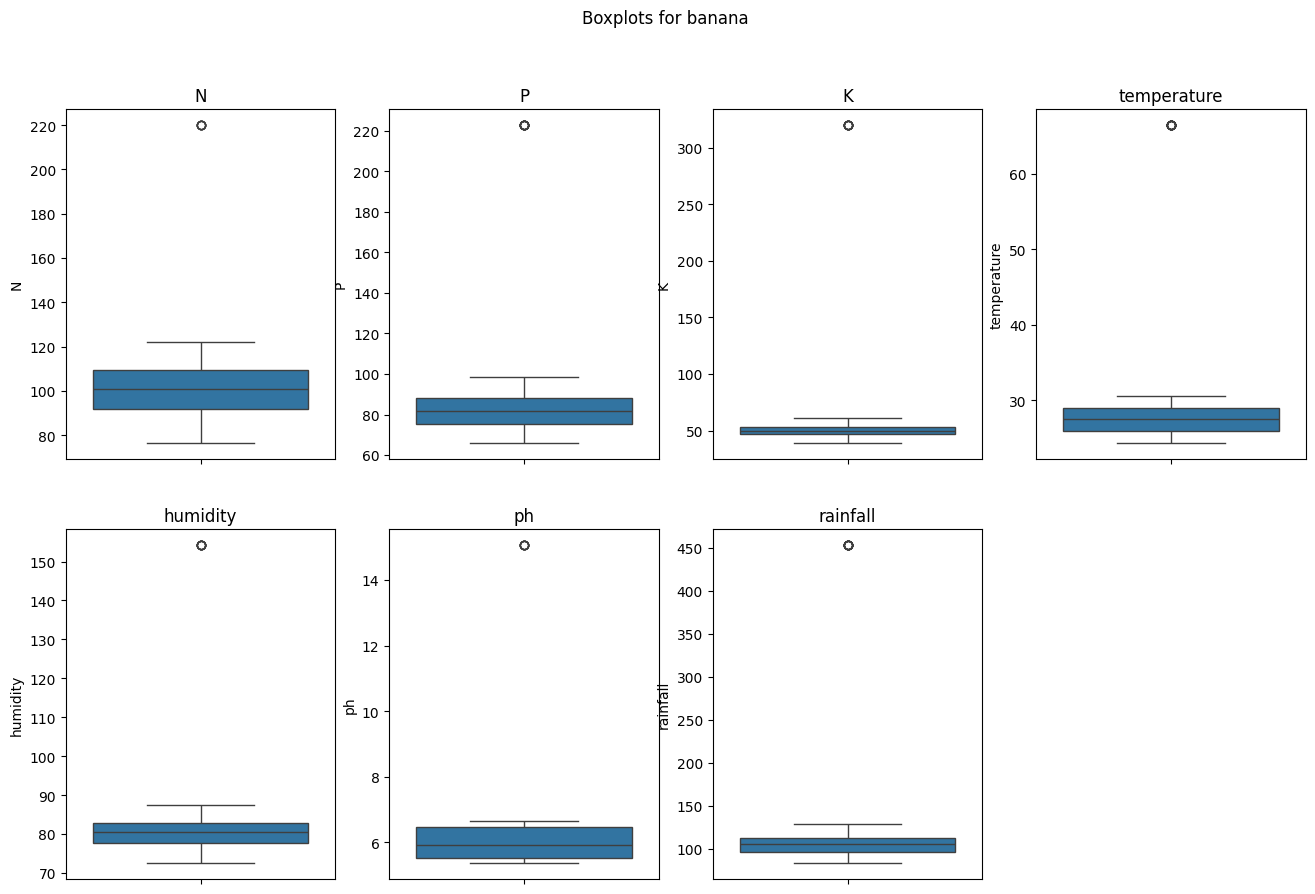

Outlier check for crop: mango


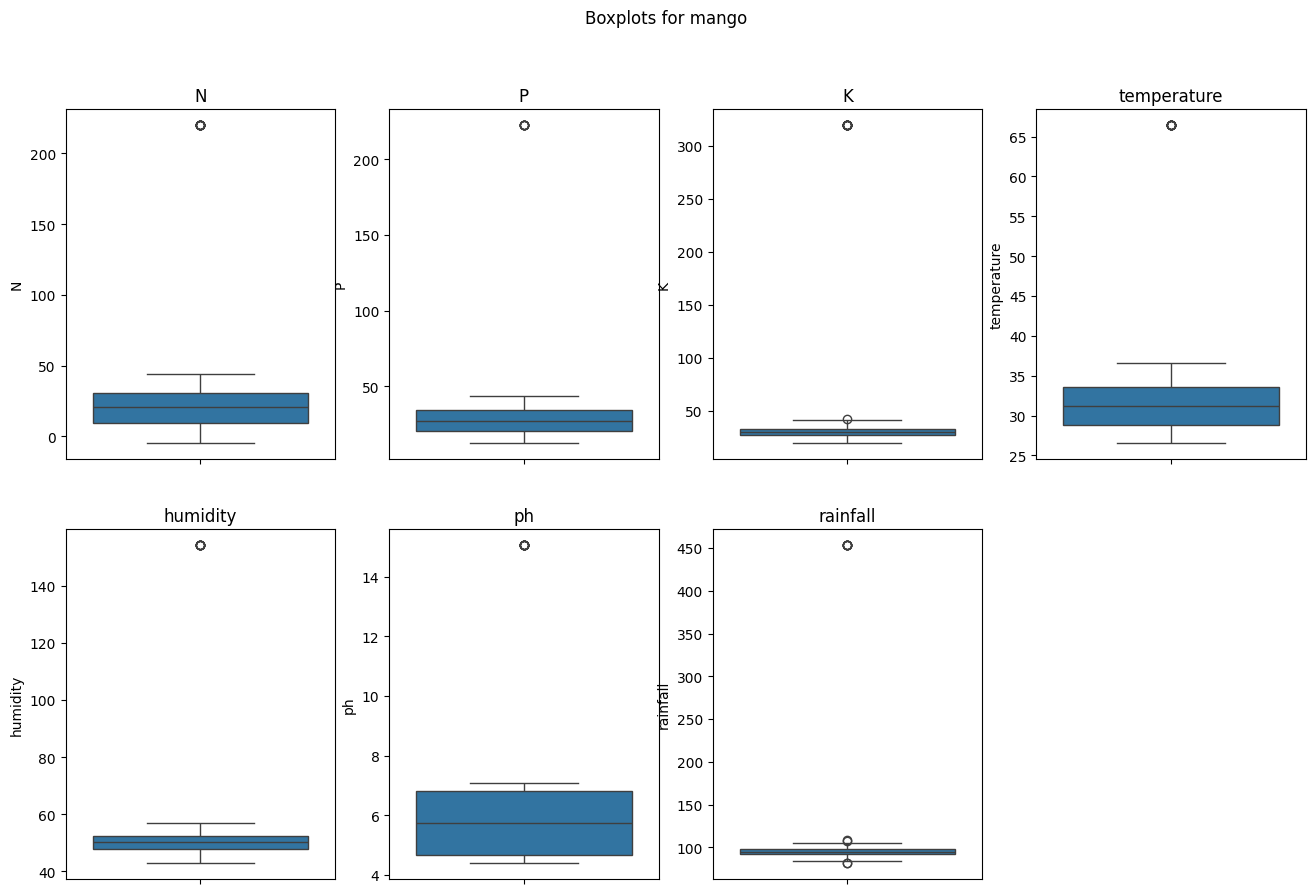

Outlier check for crop: grapes


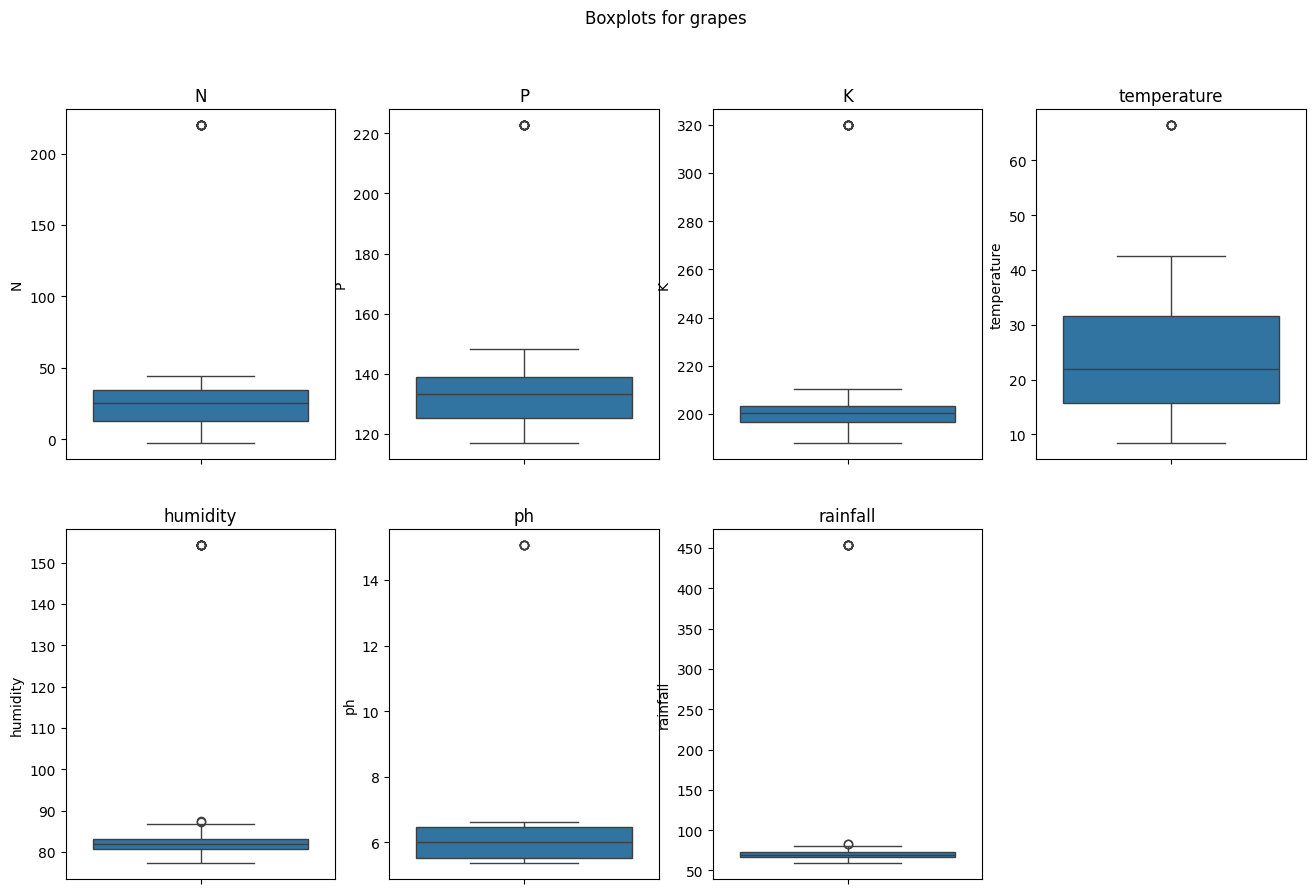

Outlier check for crop: watermelon


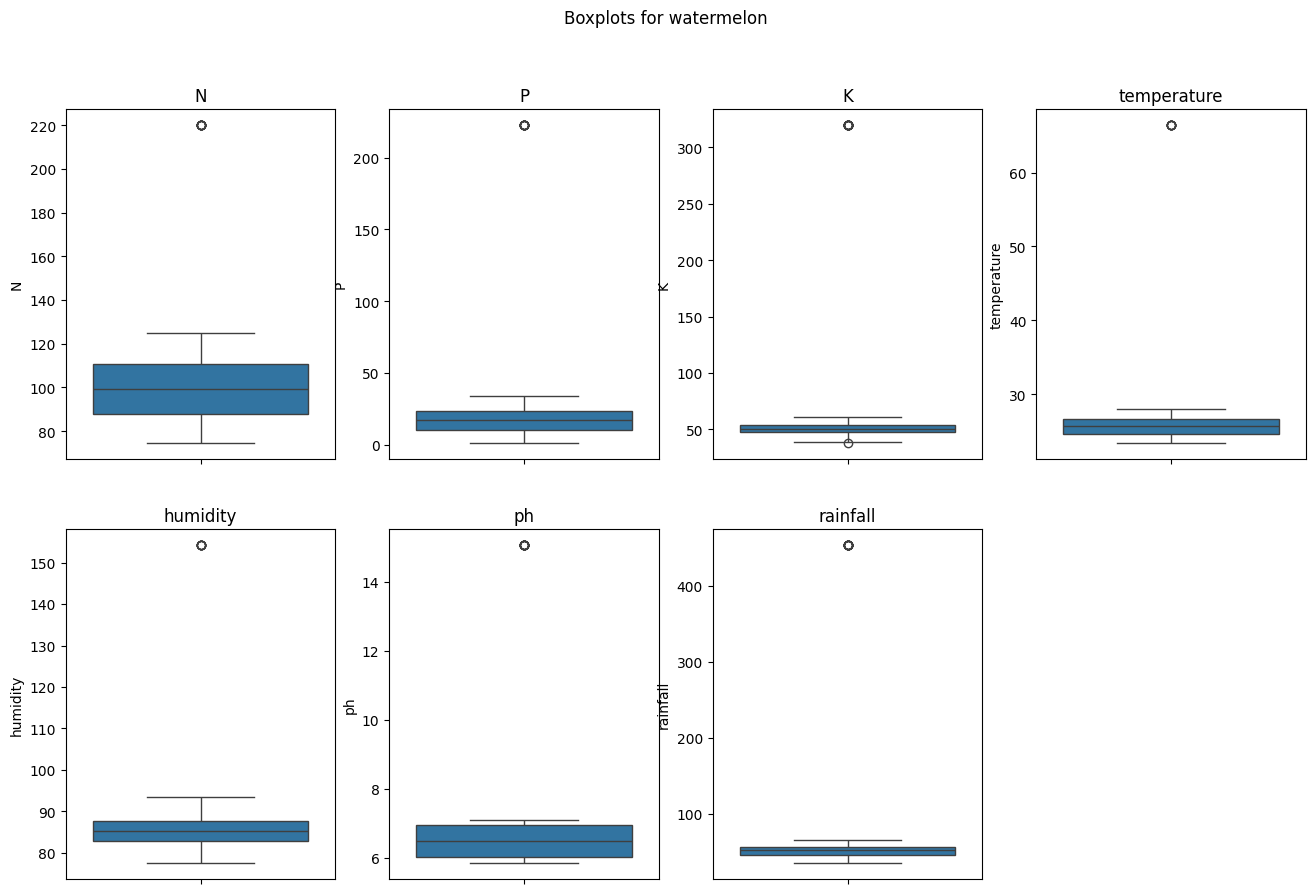

Outlier check for crop: muskmelon


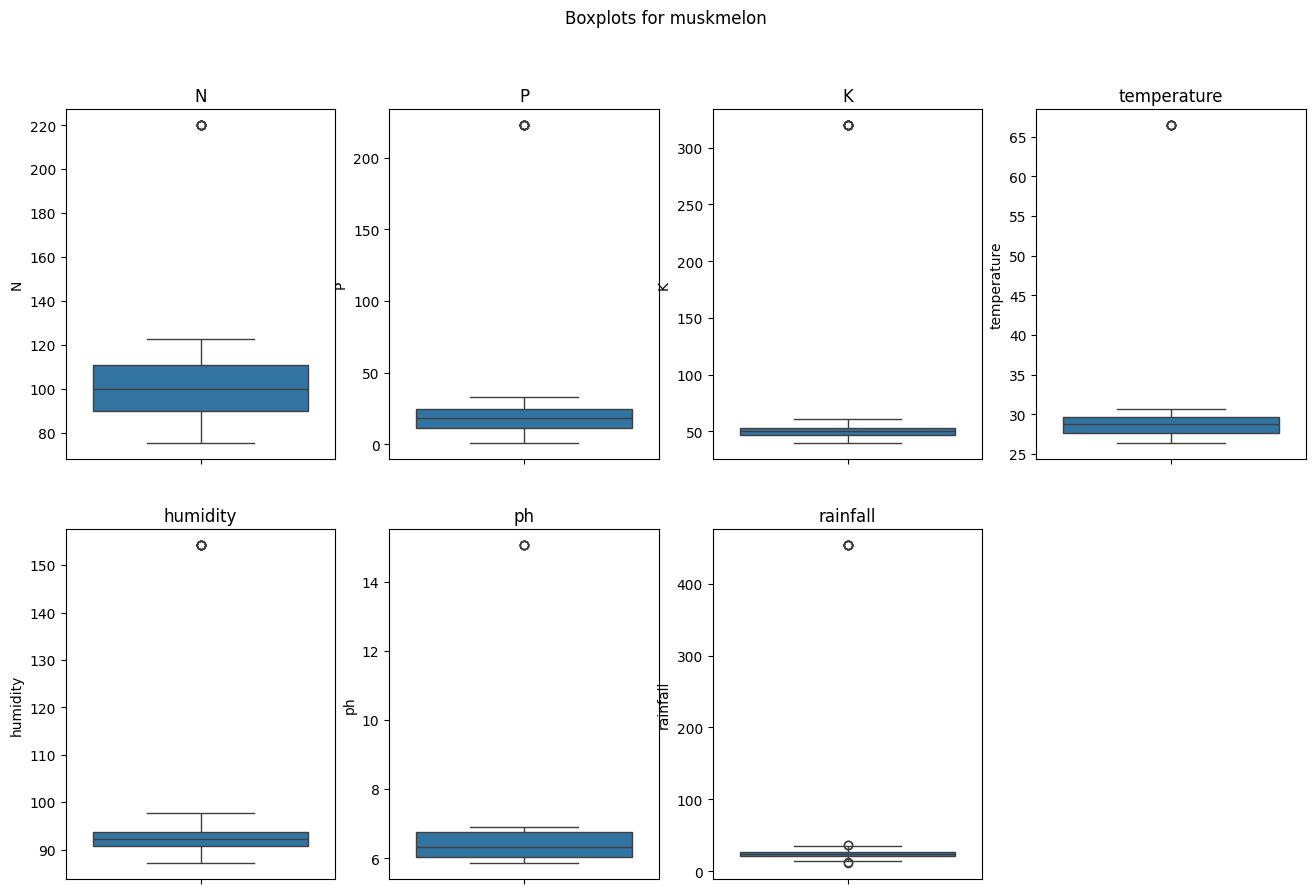

Outlier check for crop: apple


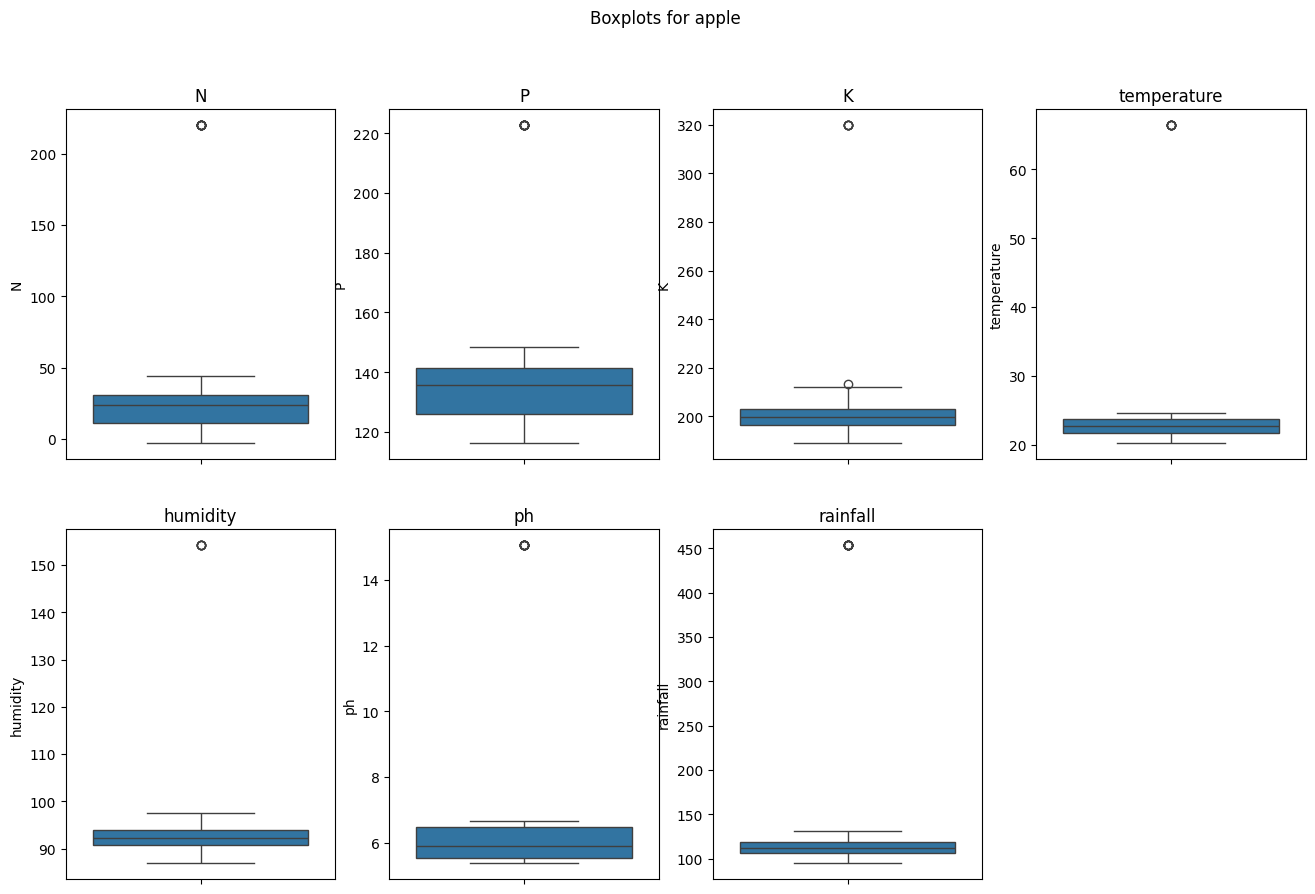

Outlier check for crop: orange


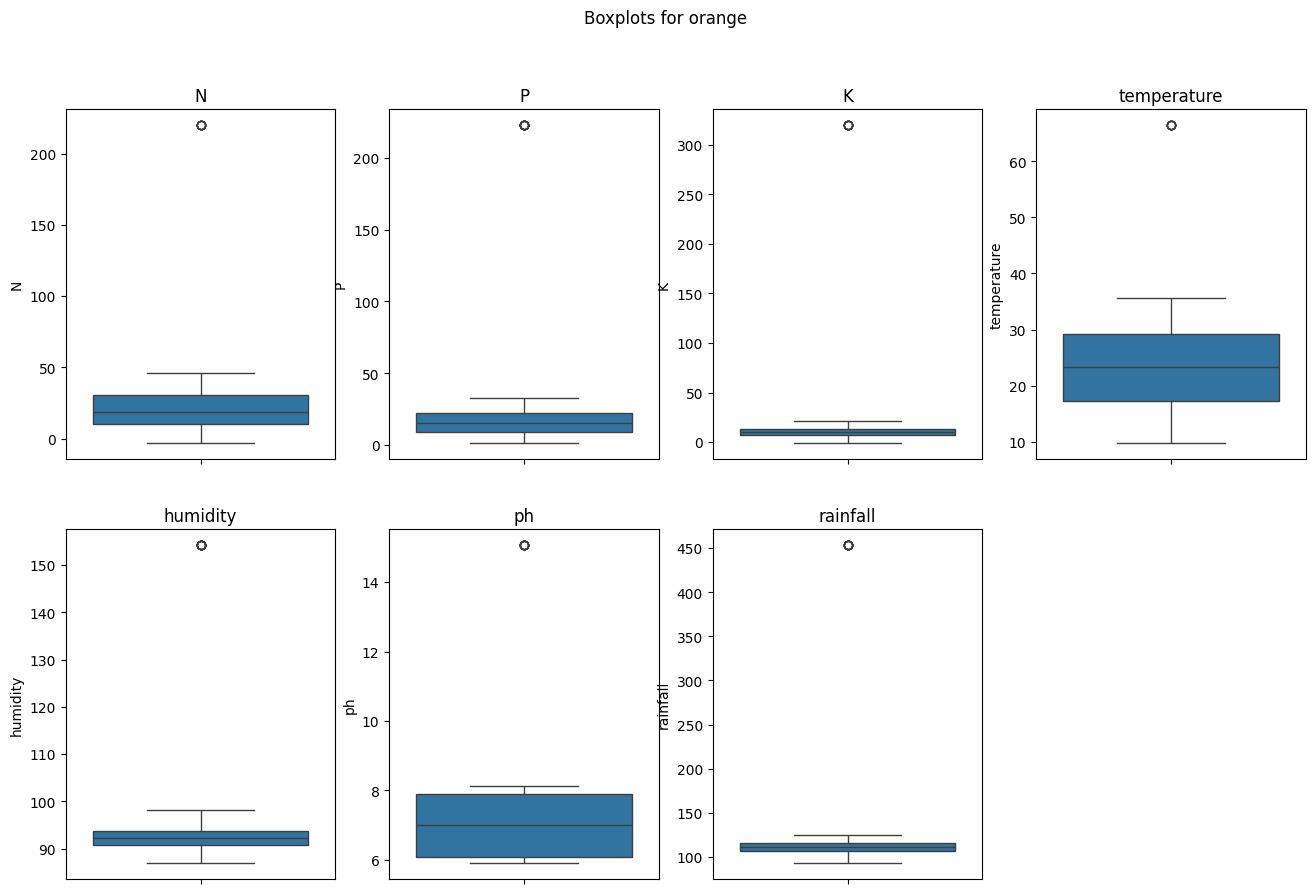

Outlier check for crop: papaya


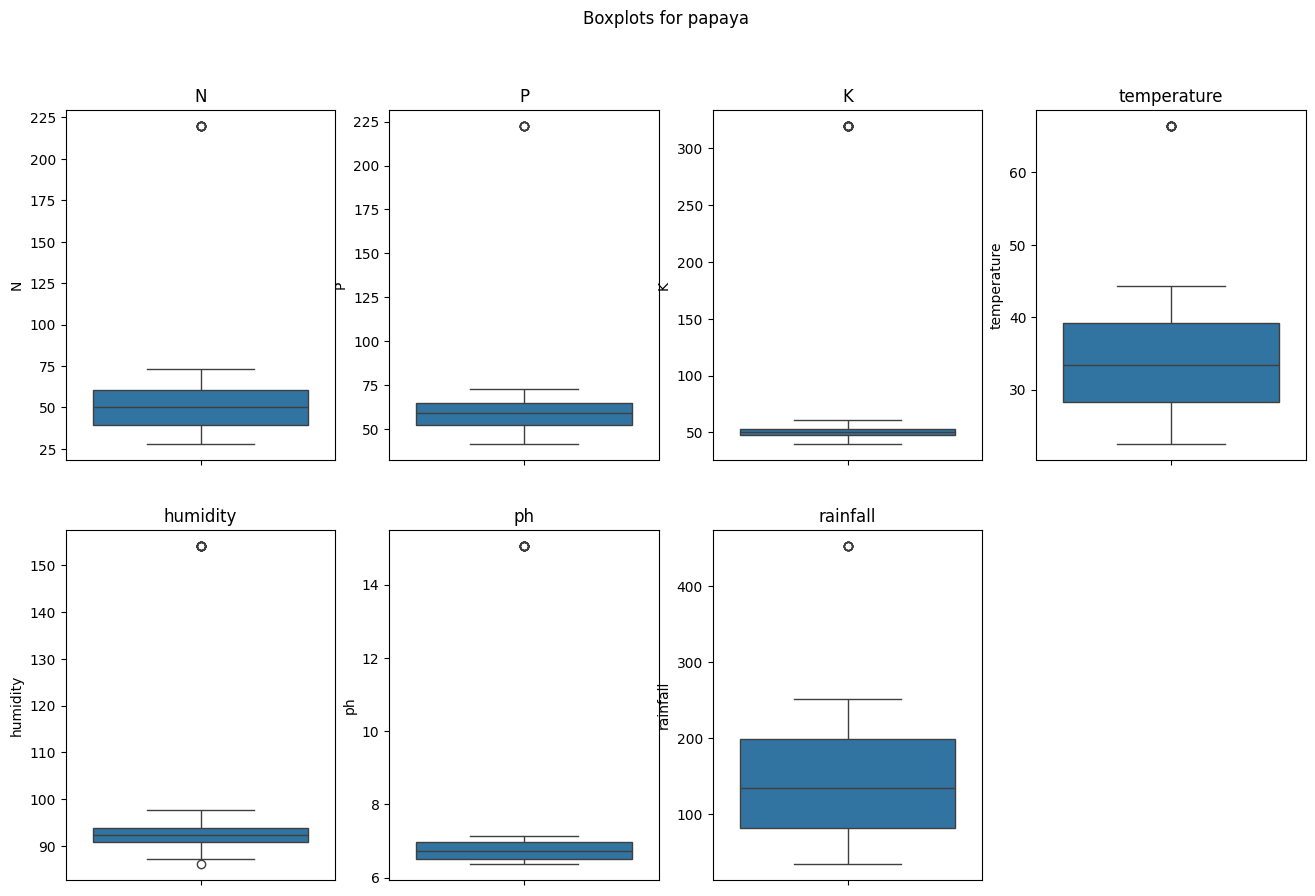

Outlier check for crop: coconut


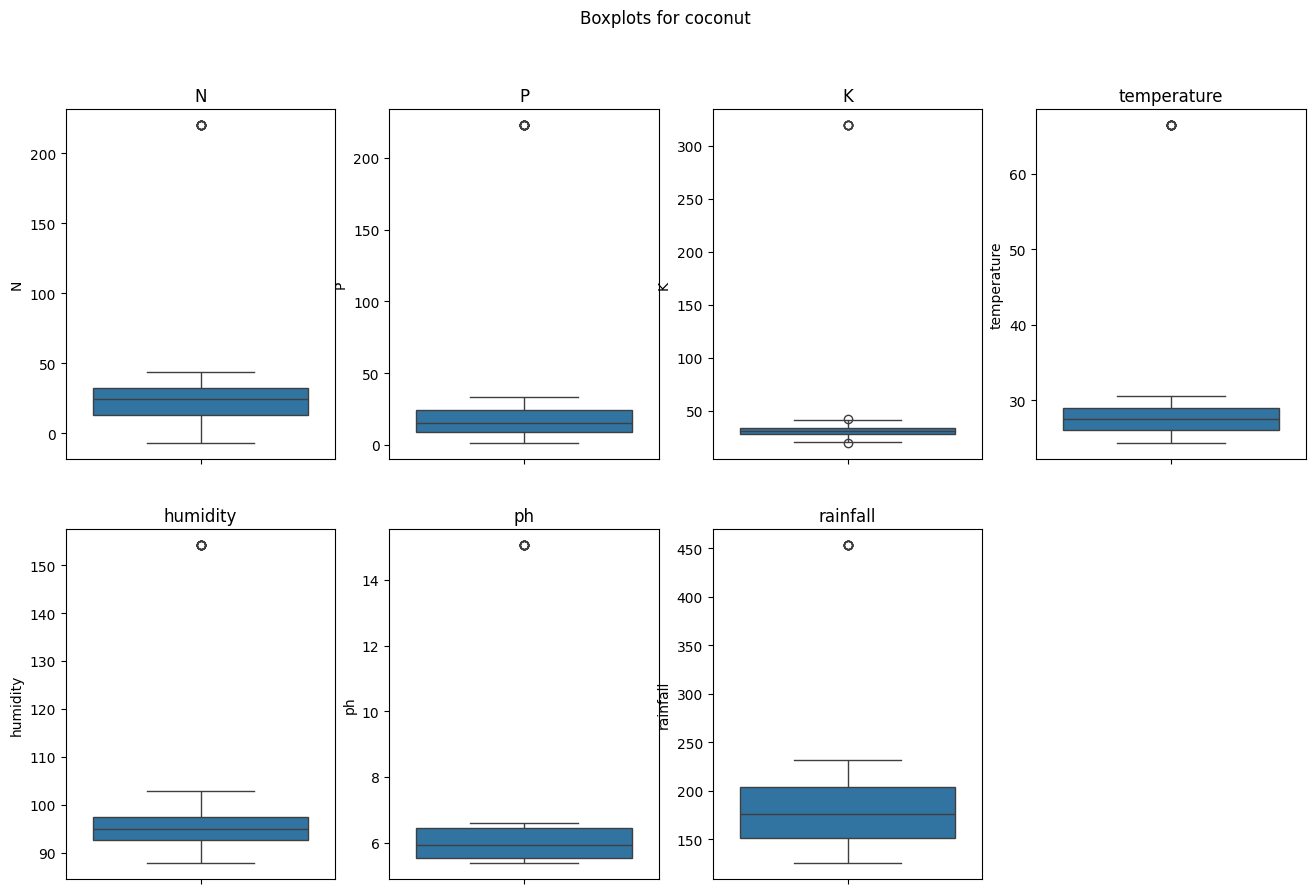

Outlier check for crop: cotton


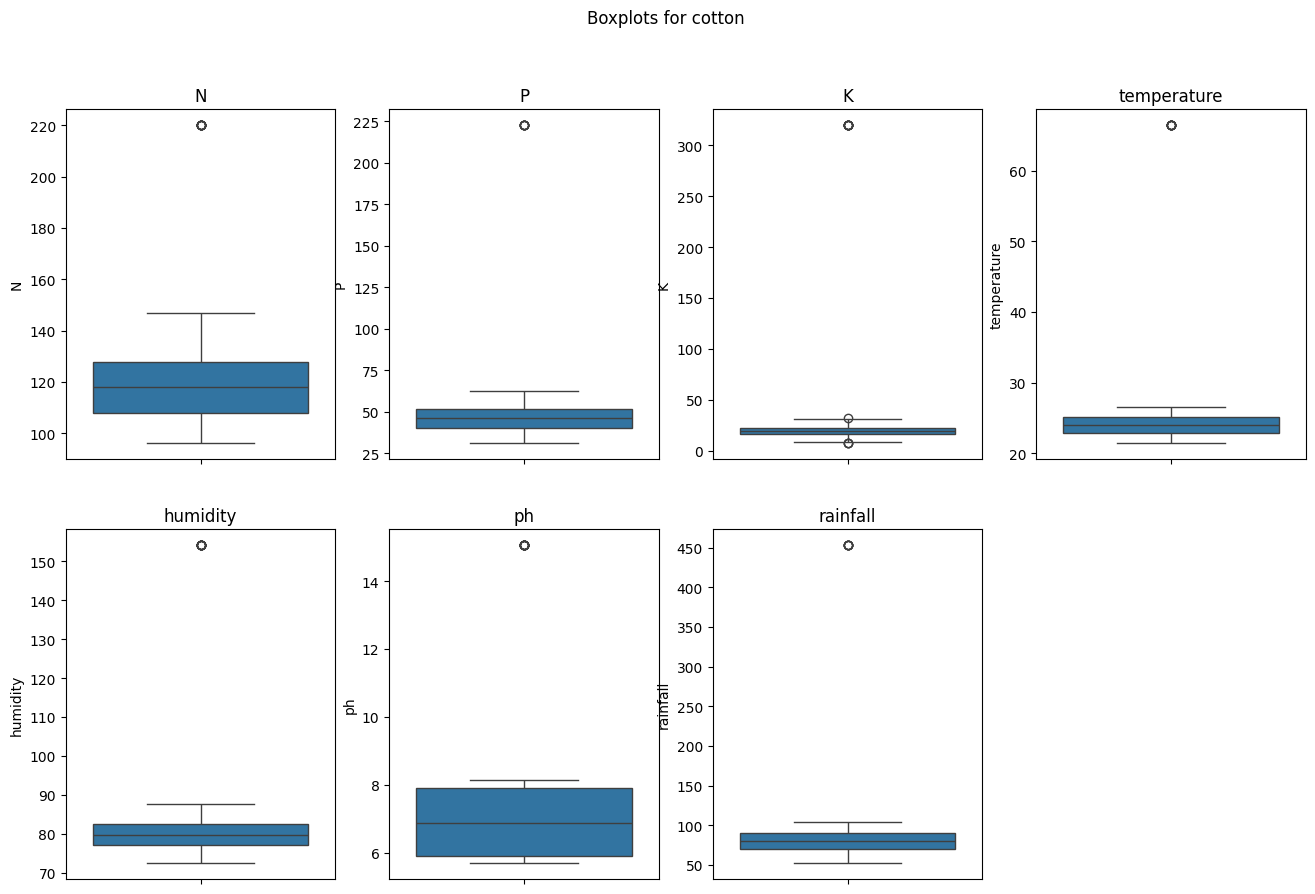

Outlier check for crop: jute


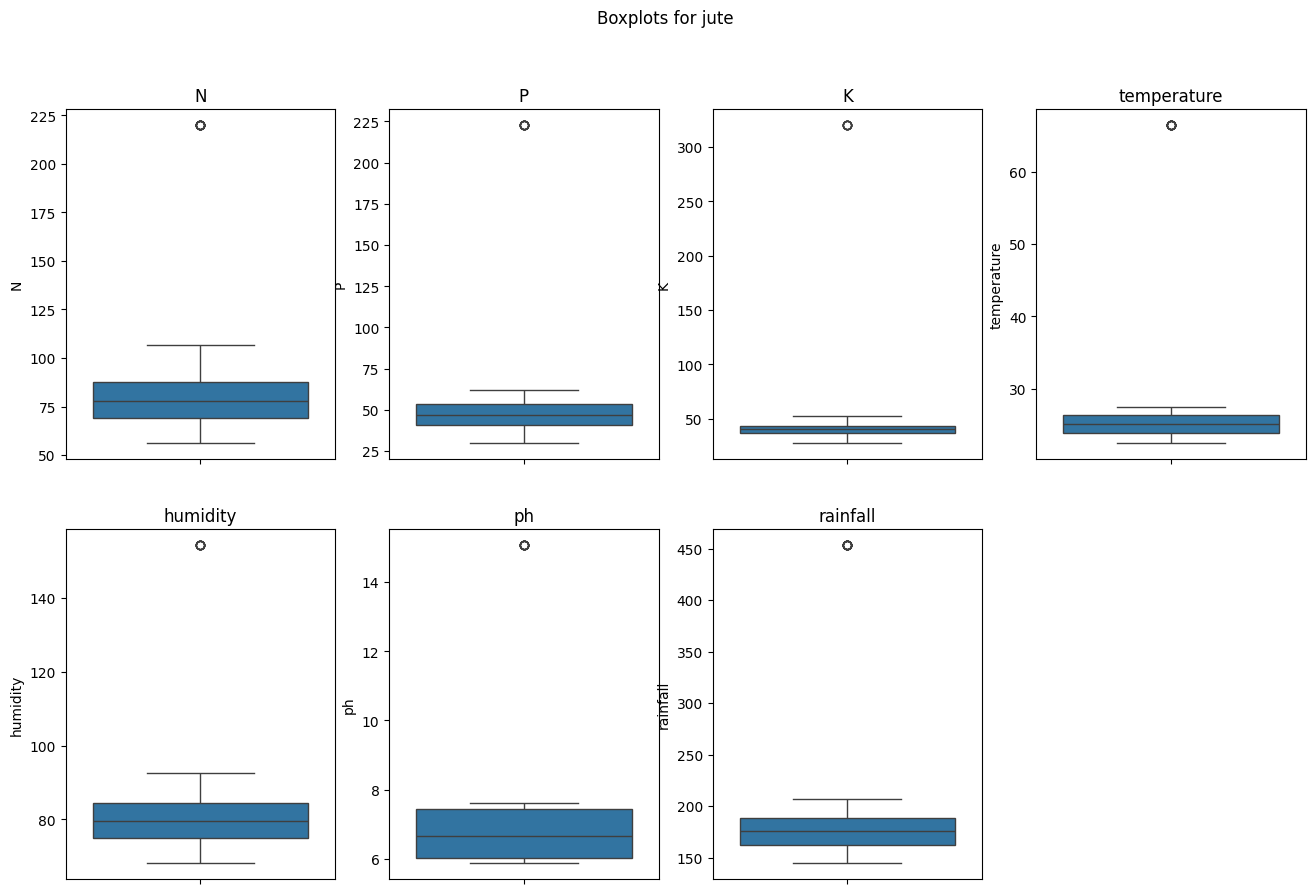

Outlier check for crop: coffee


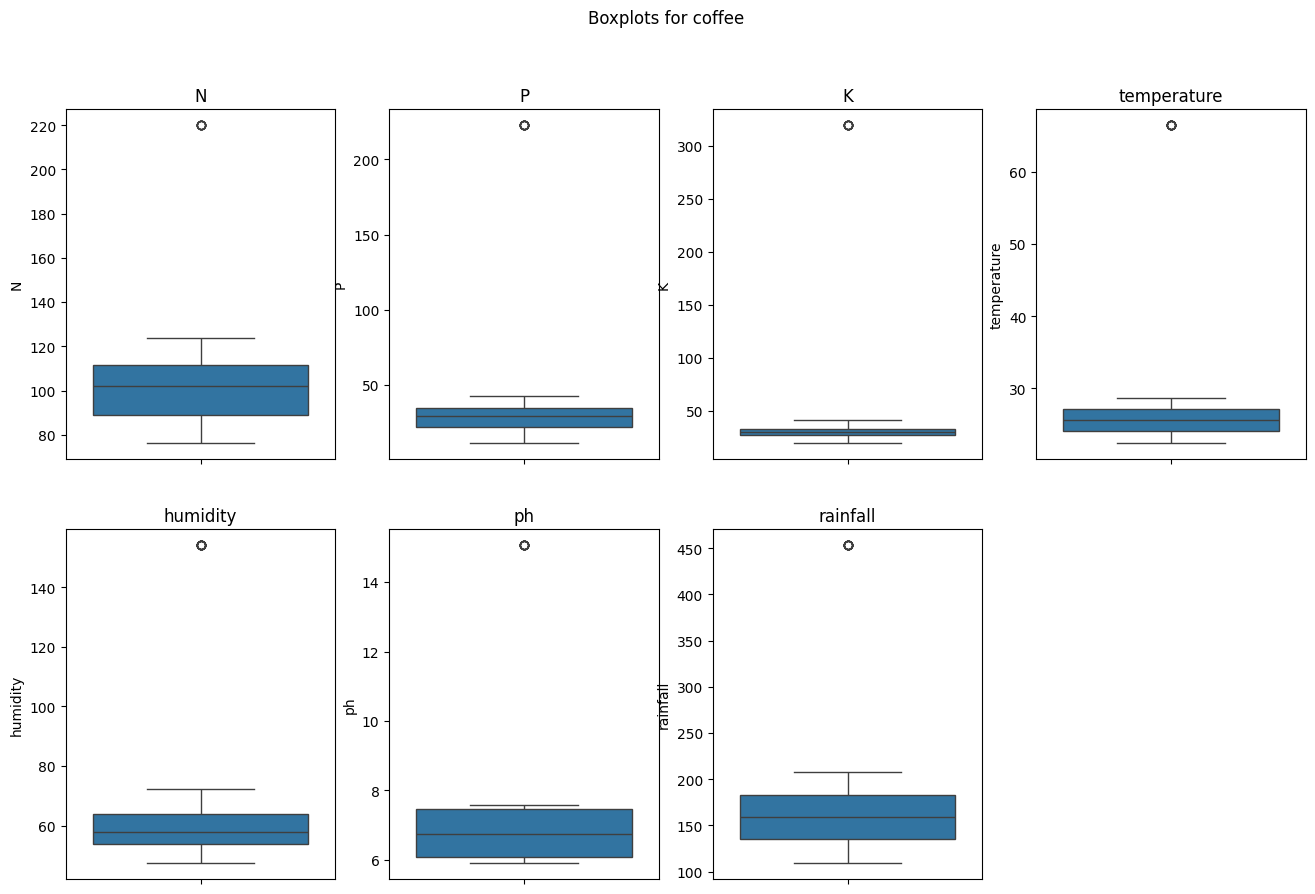

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

for crop in df['label'].unique():
    print(f"Outlier check for crop: {crop}")
    crop_df = df[df['label'] == crop]

    plt.figure(figsize=(16, 10))
    for i, feature in enumerate(features):
        plt.subplot(2, 4, i+1)
        sns.boxplot(y=crop_df[feature])
        plt.title(f'{feature}')
    plt.suptitle(f'Boxplots for {crop}')
    plt.show()


In [ ]:
def count_outliers_per_class(df, features, label_col='label'):
    outlier_counts = {}

    for crop in df[label_col].unique():
        crop_df = df[df[label_col] == crop]
        crop_outliers = {}

        for col in features:
            Q1 = crop_df[col].quantile(0.25)
            Q3 = crop_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = crop_df[(crop_df[col] < lower_bound) | (crop_df[col] > upper_bound)]
            crop_outliers[col] = outliers.shape[0]  # count of outliers in this feature

        outlier_counts[crop] = crop_outliers

    return pd.DataFrame(outlier_counts).T  # Transpose for better readability

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
outlier_counts_df = count_outliers_per_class(df, features)

print(outlier_counts_df)


              N   P   K  temperature  humidity  ph  rainfall
rice         16   8  12           14        12  10        13
maize        10   5  11            8         9  11         9
chickpea     10   6   6           10        11   7        10
kidneybeans  10  10  18           16         7   9         6
pigeonpeas   11  14   7            8         8  13         9
mothbeans     7  12  10            9        11  11        15
mungbean     10  14   9            7        12   7        14
blackgram     7  11  12           12        10   8        11
lentil       13  14  15           11        11   9        14
pomegranate  10  11   8            7        10  15        11
banana        5  10   8           16         7   6        11
mango        14   7  15           13         9  12        11
grapes       14  11  13            8        16   5        10
watermelon   10  12  20            7         7  14        15
muskmelon     9  11  13            7        10   5        11
apple        11  12   6 

In [ ]:
def remove_outliers_per_class(df, features, label_col='label'):
    df_clean = pd.DataFrame(columns=df.columns)  # Empty dataframe to collect cleaned data

    for crop in df[label_col].unique():
        crop_df = df[df[label_col] == crop]

        for col in features:
            Q1 = crop_df[col].quantile(0.25)
            Q3 = crop_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Remove outliers for this feature in this crop
            crop_df = crop_df[(crop_df[col] >= lower_bound) & (crop_df[col] <= upper_bound)]

        df_clean = pd.concat([df_clean, crop_df], ignore_index=True)

    return df_clean

features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
df_clean = remove_outliers_per_class(df, features)

print("Shape after label-wise outlier removal:", df_clean.shape)
print("Unique labels after removal:", df_clean['label'].nunique())
print("Labels present:", df_clean['label'].unique())


/tmp/ipython-input-6-108010926.py:17: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_clean = pd.concat([df_clean, crop_df], ignore_index=True)


Shape after label-wise outlier removal: (22668, 8)
Unique labels after removal: 22
Labels present: ['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'pomegranate' 'banana' 'mango' 'grapes'
 'watermelon' 'muskmelon' 'apple' 'orange' 'papaya' 'coconut' 'cotton'
 'jute' 'coffee']


In [ ]:
outlier_counts_after_removal = count_outliers_per_class(df_clean, features)
print(outlier_counts_after_removal)


             N  P  K  temperature  humidity  ph  rainfall
rice         0  0  0            0         0   0         0
maize        0  0  0            0         0   0         0
chickpea     0  0  0            0         0   0         0
kidneybeans  0  0  0            0         0   0         0
pigeonpeas   0  0  0            0         0   0         0
mothbeans    0  0  0            0         0   0         0
mungbean     0  0  0            0         0   0         0
blackgram    0  0  1            0         0   0         0
lentil       0  0  2            0         0   0         0
pomegranate  0  0  0            0         0   0         2
banana       0  0  0            0         0   0         0
mango        0  0  1            0         0   0         0
grapes       0  0  0            0         0   0         1
watermelon   0  0  0            0         0   0         0
muskmelon    0  0  0            0         0   0         0
apple        0  0  0            0         0   0         0
orange       0

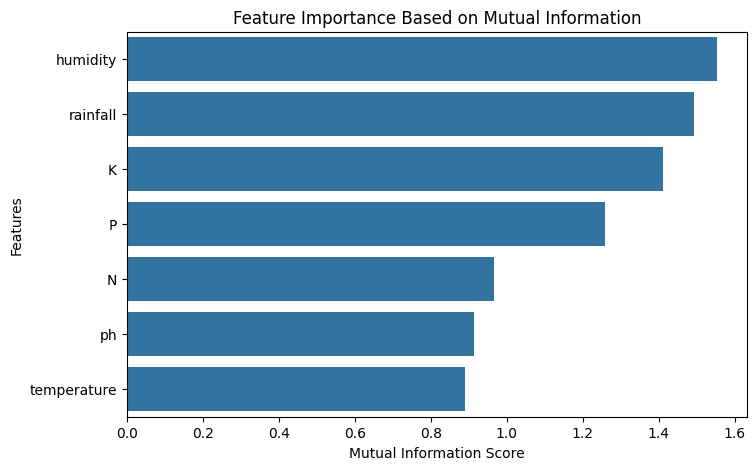

In [ ]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop(columns=["label"])
y = df["label"]

# mutual information scores
mi_scores = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=mi_scores, y=mi_scores.index)
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.title("Feature Importance Based on Mutual Information")
plt.show()


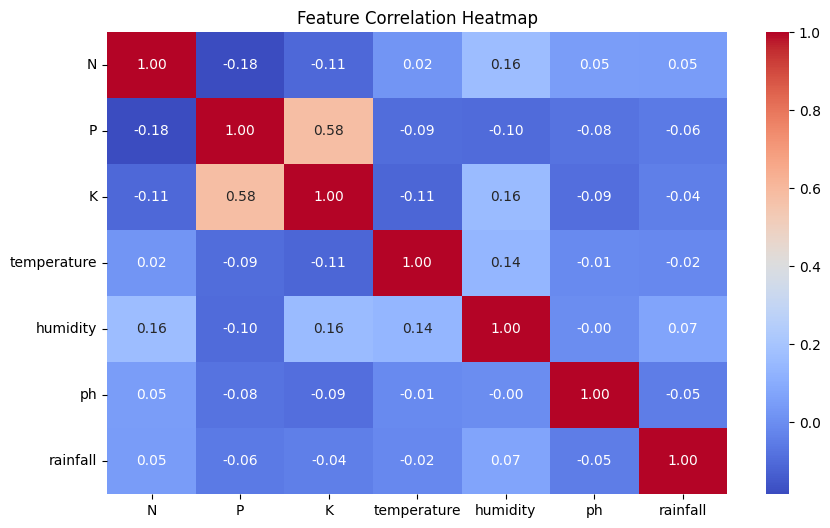

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.drop(columns=["label"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top K best features
k_best = SelectKBest(score_func=f_classif, k=7)
X_selected = k_best.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[k_best.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')


**1.Check if Data is Linearly Separable using PCA**

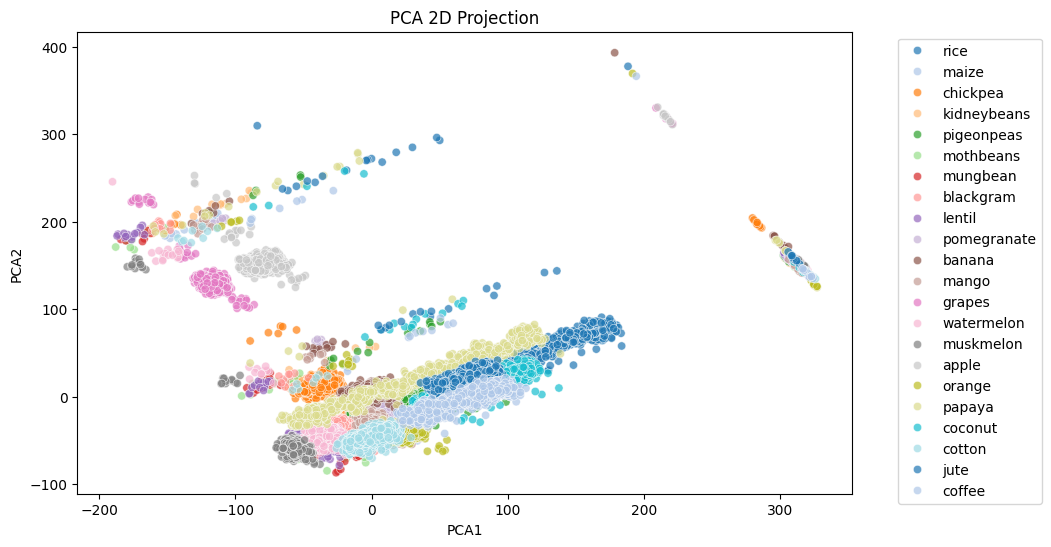

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["label_encoded"] = le.fit_transform(df["label"])

# Apply PCA to reduce dimensions to 2D
pca_2d = PCA(n_components=2)
pca_2d_result = pca_2d.fit_transform(df.drop(columns=["label", "label_encoded"]))

# Convert to DataFrame
pca_df = pd.DataFrame(pca_2d_result, columns=["PCA1", "PCA2"])
pca_df["Crop"] = df["label"]

# Plot PCA in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Crop", palette="tab20", data=pca_df, alpha=0.7)
plt.title("PCA 2D Projection")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


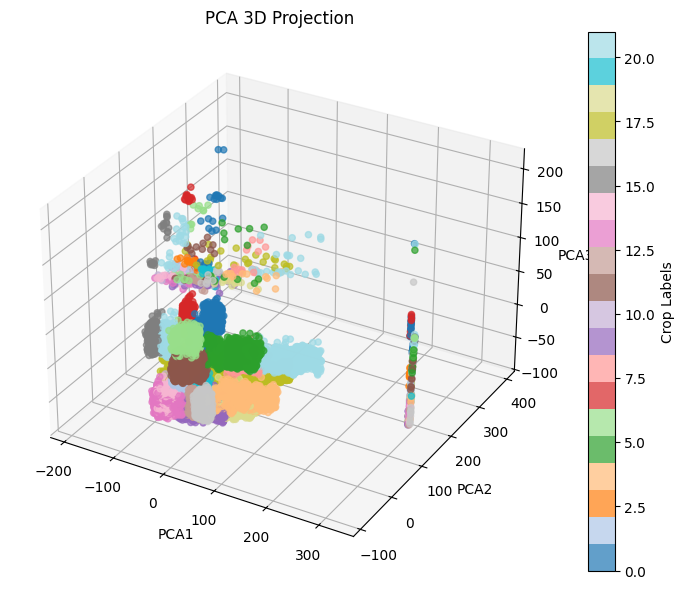

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

#  reduce dimensions to 3D
pca_3d = PCA(n_components=3)
pca_3d_result = pca_3d.fit_transform(df.drop(columns=["label", "label_encoded"]))

pca_df_3d = pd.DataFrame(pca_3d_result, columns=["PCA1", "PCA2", "PCA3"])
pca_df_3d["Crop"] = df["label"]

# 3D Scatter Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
pca_df_3d = pca_df_3d.dropna(subset=["Crop"])

sc = ax.scatter(pca_df_3d["PCA1"], pca_df_3d["PCA2"], pca_df_3d["PCA3"],
                c=le.transform(pca_df_3d["Crop"]), cmap="tab20", alpha=0.7)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("PCA 3D Projection")
plt.colorbar(sc, ax=ax, label="Crop Labels")
plt.show()


**2. Check Distance Distribution for KNN**

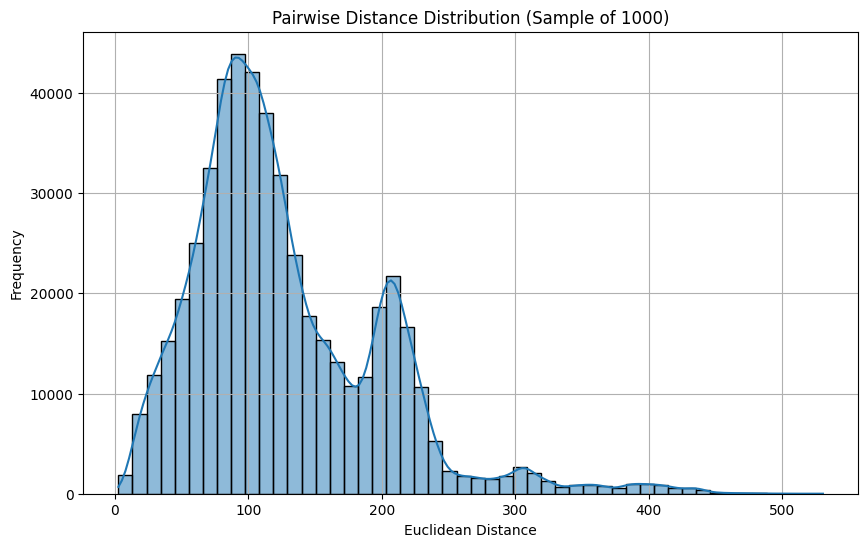

In [ ]:
from scipy.spatial.distance import pdist

# Randomly sample 1000 rows for distance analysis
sample_df = df.sample(n=1000, random_state=42)

# Drop label columns
features_only = sample_df.drop(columns=['label', 'label_encoded'], errors='ignore')

# Compute pairwise Euclidean distances
distance_matrix = pdist(features_only, metric='euclidean')

# Plot histogram of pairwise distances
plt.figure(figsize=(10, 6))
sns.histplot(distance_matrix, bins=50, kde=True)
plt.title("Pairwise Distance Distribution (Sample of 1000)")
plt.xlabel("Euclidean Distance")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# **Data Preprocessing (Encoding, Splitting, Scaling)**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding
le = LabelEncoder()
df_clean['label_encoded'] = le.fit_transform(df_clean['label'])

# To check the mapping:
print("Label Encoding Mapping:")
for i, class_label in enumerate(le.classes_):
    print(f"{i}: {class_label}")


Label Encoding Mapping:
0: apple
1: banana
2: blackgram
3: chickpea
4: coconut
5: coffee
6: cotton
7: grapes
8: jute
9: kidneybeans
10: lentil
11: maize
12: mango
13: mothbeans
14: mungbean
15: muskmelon
16: orange
17: papaya
18: pigeonpeas
19: pomegranate
20: rice
21: watermelon


In [ ]:
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
X = df_clean[features]
y = df_clean['label_encoded']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)  # Stratify to balance classes
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (18134, 7)
Test shape: (4534, 7)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
print(y)

0        20
1        20
2        20
3        20
4        20
         ..
22663     5
22664     5
22665     5
22666     5
22667     5
Name: label_encoded, Length: 22668, dtype: int64


In [ ]:
np.unique(y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

#**Model Training + Validation**

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Dictionary to store results
results = {}

# Models that don't need scaling
models_raw = {
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier(),
    'RandomForest': RandomForestClassifier(),
    'DecisionTree': DecisionTreeClassifier()
}

# Models that need scaling
models_scaled = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000)
}

# Train non-scaled models
for name, model in models_raw.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Train scaled models
for name, model in models_scaled.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

# Show all results
print("\nModel Accuracy Scores:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:16:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 18134, number of used features: 7
[LightGBM] [Info] Start training from score -3.084118
[LightGBM] [Info] Start training from score -3.081711
[LightGBM] [Info] Start training from score -3.088949
[LightGBM] [Info] Start training from score -3.079311
[LightGBM] [Info] Start training from score -3.087739
[LightGBM] [Info] Start training from score -3.088949
[LightGBM] [Info] Start training from score -3.093804
[LightGBM] [Info] Start training from score -3.096240
[LightGBM] [Info] Start training from score -3.084118
[LightGBM] [Info] Start training from score -3.097460
[LightGBM] [Info] Start training from score -3.107276
[LightGBM] [Info] Start training from score -3.084118
[LightGBM] [Info] Start training from score -3.098682
[LightGBM]

**Comparison**

In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy'])
results_df = results_df.sort_values(by='Accuracy', ascending=False)

(
    results_df.style
    .format({'Accuracy': '{:.4f}'})
    .set_caption("📊 Model Accuracy Comparison")
    .background_gradient(cmap='YlGnBu')
    .highlight_max(color='#c6f7e9')
    .highlight_min(color='#f7c6c6')
    .set_properties(**{'color': 'black'})
)


**Cross-Validation (RandomForest)**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='accuracy')  # 5-fold CV
print("RandomForest 5-Fold CV Accuracy: %.4f (+/- %.4f)" % (scores.mean(), scores.std()))


RandomForest 5-Fold CV Accuracy: 0.9957 (+/- 0.0009)


**Hyperparameter Tuning with GridSearchCV (RandomForest)**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Params:", grid_rf.best_params_)
print("Best CV Score: %.4f" % grid_rf.best_score_)

# Evaluate on test data:
best_rf = grid_rf.best_estimator_
test_accuracy = best_rf.score(X_test, y_test)
print("Test Accuracy with Best RF:", test_accuracy)


Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best CV Score: 0.9959
Test Accuracy with Best RF: 0.9960299955888839


**Hyperparameter Tuning for LightGBM**

In [ ]:
from lightgbm import LGBMClassifier

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50],
}

grid_lgb = GridSearchCV(LGBMClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_lgb.fit(X_train, y_train)

print("Best Params:", grid_lgb.best_params_)
print("Best CV Score: %.4f" % grid_lgb.best_score_)

# Evaluate on test data:
best_lgb = grid_lgb.best_estimator_
test_accuracy = best_lgb.score(X_test, y_test)
print("Test Accuracy with Best LightGBM:", test_accuracy)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 18134, number of used features: 7
[LightGBM] [Info] Start training from score -3.084118
[LightGBM] [Info] Start training from score -3.081711
[LightGBM] [Info] Start training from score -3.088949
[LightGBM] [Info] Start training from score -3.079311
[LightGBM] [Info] Start training from score -3.087739
[LightGBM] [Info] Start training from score -3.088949
[LightGBM] [Info] Start training from score -3.093804
[LightGBM] [Info] Start training from score -3.096240
[LightGBM] [Info] Start training from score -3.084118
[LightGBM] [Info] Start training from score -3.097460
[LightGBM] [Info] Start training from score -3.107276
[LightGBM] [Info] Start training from score -3.084118
[LightGBM] [Info] Start training from score -3.098682
[LightGBM]

**Hyperparameter Tuning for XGBoost**

In [ ]:
from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 6],
}

grid_xgb = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                        param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

print("Best Params:", grid_xgb.best_params_)
print("Best CV Score: %.4f" % grid_xgb.best_score_)

# Evaluate on test data:
best_xgb = grid_xgb.best_estimator_
test_accuracy = best_xgb.score(X_test, y_test)
print("Test Accuracy with Best XGBoost:", test_accuracy)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:46:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best CV Score: 0.9950
Test Accuracy with Best XGBoost: 0.9955888839876489


after choosing Random Forest

SHAP to Explain the Model

In [ ]:
pip install shap


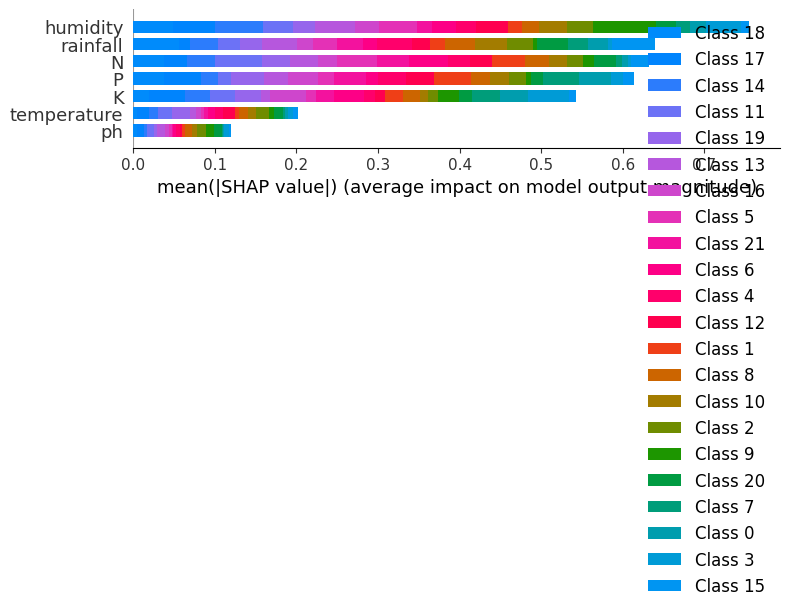

In [ ]:
shap.summary_plot(shap_values, X_test, feature_names=features, plot_type="bar")   #Shows which features are overall most important


# **load and save best model**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import joblib

# 1. Train Final RandomForest Model (Best Hyperparameters)
best_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_split=2,
    random_state=42
)
best_rf.fit(X_train, y_train)

# 2. Save the Trained Model
joblib.dump(best_rf, 'best_random_forest_model.pkl')
print(" Model saved as 'best_random_forest_model.pkl'")

# 3. Save the Label Encoder (used to decode predicted labels)
joblib.dump(le, 'label_encoder.pkl')
print(" Label encoder saved as 'label_encoder.pkl'")


# 3. Load the Model (Simulate Deployment)
loaded_rf = joblib.load('best_random_forest_model.pkl')
print(" Model loaded successfully")

# 4. Evaluate on Test Set
y_pred = loaded_rf.predict(X_test)

# Calculate Accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(" Test Set Accuracy:", test_accuracy)

# Classification Report
print("\n Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


 Model saved as 'best_random_forest_model.pkl'
 Label encoder saved as 'label_encoder.pkl'
 Model loaded successfully
 Test Set Accuracy: 0.9960299955888839

 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00       208
      banana       1.00      1.00      1.00       208
   blackgram       1.00      1.00      1.00       206
    chickpea       1.00      1.00      1.00       209
     coconut       1.00      1.00      1.00       207
      coffee       1.00      1.00      1.00       206
      cotton       1.00      1.00      1.00       205
      grapes       1.00      1.00      1.00       205
        jute       0.95      1.00      0.97       208
 kidneybeans       1.00      1.00      1.00       205
      lentil       0.99      0.99      0.99       203
       maize       1.00      1.00      1.00       208
       mango       1.00      1.00      1.00       204
   mothbeans       0.99      1.00      0.99       205
    mun

#**Deployment**

In [ ]:
import pandas as pd
import joblib

# Load the saved model and label encoder
model = joblib.load('best_random_forest_model.pkl')
le = joblib.load('label_encoder.pkl')

# Feature names in correct order
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Take input from the user (farmer)
print("Please enter the following soil and weather values:")

input_values = []
for feature in feature_names:
    value = float(input(f"Enter value for {feature}: "))
    input_values.append(value)

# Create DataFrame for the input
farmer_input = pd.DataFrame([input_values], columns=feature_names)

# Predict
pred_label_encoded = model.predict(farmer_input)[0]
pred_label = le.inverse_transform([pred_label_encoded])[0]
x = pred_label
print("\n🌾 Recommended Crop for the Given Conditions:", pred_label)


Please enter the following soil and weather values:
Enter value for N: 80
Enter value for P: 45
Enter value for K: 40
Enter value for temperature: 24.5
Enter value for humidity: 80
Enter value for ph: 6.3
Enter value for rainfall: 200

🌾 Recommended Crop for the Given Conditions: rice


# **OR**

In [ ]:
!pip install pulp
import pulp
from pulp import LpProblem, LpVariable, lpSum, LpMaximize, LpStatus, value


In [ ]:

# ---- ML OUTPUT ----
selected_crop = x

# ---- Optimization Function ----
def optimize_fertilizer(selected_crop, Y, P, costs):
    crop_nutrient_data = {
        "rice":         ((80, 100), (40, 50), (30, 40)),
        "maize":        ((100, 150), (50, 60), (40, 50)),
        "chickpea":     ((20, 25), (40, 50), (30, 40)),
        "kidney beans": ((25, 30), (50, 60), (30, 40)),
        "pigeonpeas":   ((25, 30), (30, 40), (30, 40)),
        "mothbeans":    ((20, 25), (30, 40), (20, 30)),
        "mungbean":     ((20, 30), (30, 40), (20, 30)),
        "blackgram":    ((20, 30), (30, 40), (20, 30)),
        "lentil":       ((25, 30), (40, 50), (30, 40)),
        "watermelon":   ((80, 120), (40, 60), (60, 100)),
        "muskmelon":    ((80, 120), (40, 60), (60, 100)),
        "apple":        ((50, 80), (30, 50), (30, 50)),
        "orange":       ((100, 150), (30, 60), (200, 300)),
        "papaya":       ((100, 150), (50, 75), (150, 200)),
        "coconut":      ((150, 200), (50, 75), (250, 300)),
        "cotton":       ((150, 200), (50, 80), (100, 150)),
        "jute":         ((100, 150), (50, 60), (100, 120)),
        "coffee":       ((150, 200), (50, 75), (150, 200)),
        "pomegranate":  ((40, 60), (30, 40), (40, 50)),
        "banana":       ((200, 250), (100, 150), (200, 250)),
        "mango":        ((150, 200), (50, 75), (150, 200)),
        "grapes":       ((50, 100), (25, 50), (50, 100)),
    }

    fertilizers = {
        "Urea": {"N": 0.46, "P": 0.00, "K": 0.00},
        "SSP": {"N": 0.00, "P": 0.08, "K": 0.00},
        "Potassium Sulphate": {"N": 0.00, "P": 0.00, "K": 0.50},
        "Power Grow": {"N": 0.19, "P": 0.19, "K": 0.19}
    }

    if selected_crop not in crop_nutrient_data:
        raise ValueError(f"Crop '{selected_crop}' not in nutrient data.")

    # Nutrient bounds
    (N_minmax, P_minmax, K_minmax) = crop_nutrient_data[selected_crop]
    N_min, _ = N_minmax
    P_min, _ = P_minmax
    K_min, _ = K_minmax

    # Define the optimization problem
    model = LpProblem("Fertilizer_Optimization_Model", LpMaximize)
    x = {f: LpVariable(f"x_{f}", lowBound=0) for f in fertilizers}

    # Objective function: Maximize profit
    revenue = Y * P
    total_cost = lpSum(costs[f] * x[f] for f in fertilizers)
    model += revenue - total_cost, "Total_Profit"

    # Constraints
    model += lpSum(fertilizers[f]["N"] * x[f] for f in fertilizers) >= N_min, "Nitrogen_Requirement"
    model += lpSum(fertilizers[f]["P"] * x[f] for f in fertilizers) >= P_min, "Phosphorus_Requirement"
    model += lpSum(fertilizers[f]["K"] * x[f] for f in fertilizers) >= K_min, "Potassium_Requirement"

    # Solve the problem
    model.solve()

    # Results
    if model.status == 1:
        print(f"\n✅ Status: {LpStatus[model.status]}")
        print(f" Crop: {selected_crop}")
        print(f" Maximum Profit (EGP): {value(model.objective):.2f}")
        print(" Fertilizer Plan (kg):")
        for f in fertilizers:
            qty = x[f].varValue
            if qty is not None and qty > 0.001:
                print(f"  - {f}: {qty:.2f} kg")

        # Show total nutrients
        total_N = sum(fertilizers[f]["N"] * x[f].varValue for f in fertilizers)
        total_P = sum(fertilizers[f]["P"] * x[f].varValue for f in fertilizers)
        total_K = sum(fertilizers[f]["K"] * x[f].varValue for f in fertilizers)
        print("\n Total Nutrients Supplied:")
        print(f"  - Nitrogen (N): {total_N:.2f} kg")
        print(f"  - Phosphorus (P): {total_P:.2f} kg")
        print(f"  - Potassium (K): {total_K:.2f} kg")
    else:
        print("❌ No optimal solution found.")

# ---- User Inputs ----
Y = float(input("Enter crop yield (kg per hectare): "))
P = float(input("Enter selling price of crop (EGP per kg): "))

print("\nEnter cost per kg for each fertilizer:")
costs = {}
fertilizer_names = ["Urea", "SSP", "Potassium Sulphate", "Power Grow"]
for f in fertilizer_names:
    cost = float(input(f"  {f}: "))
    costs[f] = cost

# ---- Run the model ----
optimize_fertilizer(selected_crop, Y, P, costs)


Enter crop yield (kg per hectare): 60
Enter selling price of crop (EGP per kg): 45

Enter cost per kg for each fertilizer:
  Urea: 56
  SSP: 34
  Potassium Sulphate: 56
  Power Grow: 45

✅ Status: Optimal
 Crop: rice
 Maximum Profit (EGP): -11643.25
 Fertilizer Plan (kg):
  - Urea: 86.96 kg
  - Power Grow: 210.53 kg

 Total Nutrients Supplied:
  - Nitrogen (N): 80.00 kg
  - Phosphorus (P): 40.00 kg
  - Potassium (K): 40.00 kg
